# Project Objective

The objectives of the project are:

1. To visualize which store has highest weekly sales
2. To know how many holidays were there in the given time
3. To visualize the distribution of features
4. To visualize which features are affecting the weekly sales
5. To visualize which year has generated more weekly sales
6. To visualize yearly trend of sales
7. To visualize monthly trend of sales per year
8. To visualize weekly trend of sales per month per year
9. To visualize the feature affecting the weekly sales per year and comparing them
10. To find the best evaluation model
11. To predict the model using prophet with regressors
12. To verify the data obtained from prophet with the best evaluation model
13. To forecast the weekly sales for 12 weeks


# Assumptions

1. The Random Forest regression and XG Boost regression model used here is a very plain and simple model. No extra parameters are added.
2. Five features were added as regressors to make prophet model better, as there were some relationships between the weekly sales and other five features. Those five features are temperature, unemployment, cpi, fuel price, and holiday flag.
3. Out of three best models for forecasting, one model was selected based on the accuracy. With the help of the regressors added to the prophet model, the model will make predictions. Those predictions will be evaluated by using the selected
evaluation algorithm.
4. After evaluating the forecasting model, if the accuracy of the evaluation algorithm is good, then the obtained forecasting result will be best.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv('Walmart (1).csv')
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
data.isnull().sum() #no null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data['Date']=pd.to_datetime(data['Date'])
data['Month_name']=data['Date'].dt.month_name()
data['Week']=data['Date'].dt.week
data['Month']=data['Date'].dt.month

In [6]:
data.shape

(6435, 11)

In [7]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month_name', 'Week', 'Month'],
      dtype='object')

In [8]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Week        Month  
count  6435.000000   6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151    26.000000     6.475524  
std      39.356712      1.875885    14.511794     3.321797  
min     126.064000      3.879000     1.000000     1.000000  
25%     131.735000      6.891000    14.000000     4.000000  
50%     182.616521      7.874000    26.000000     6.000000  
75%     212.743293      8.622000    38.000000     9.000000  
max     227.232807     14.313000    52.000000    12.000000

In [9]:
data['Store'].nunique()

45

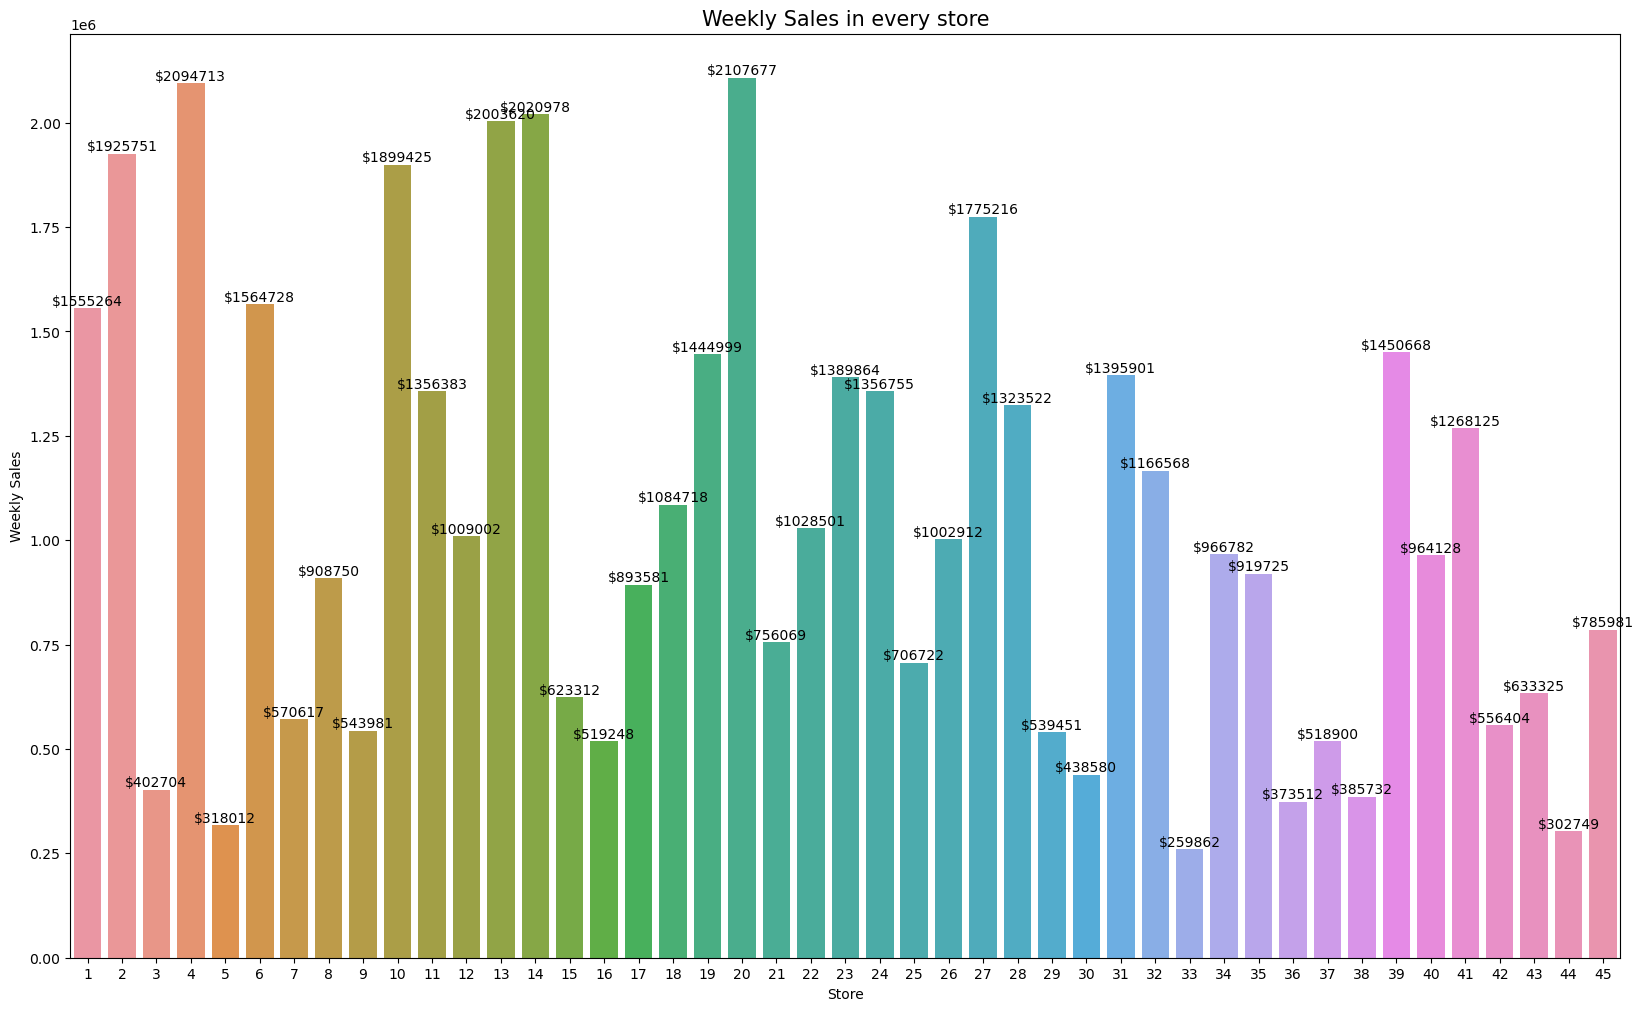

In [10]:
plt.figure(figsize=(20,12))
ax=sns.barplot(data=data,x='Store',y='Weekly_Sales',ci=None)
ax.bar_label(ax.containers[0],fmt='$%.0f')

plt.title("Weekly Sales in every store",fontsize=15)
plt.ylabel("Weekly Sales")
plt.show()

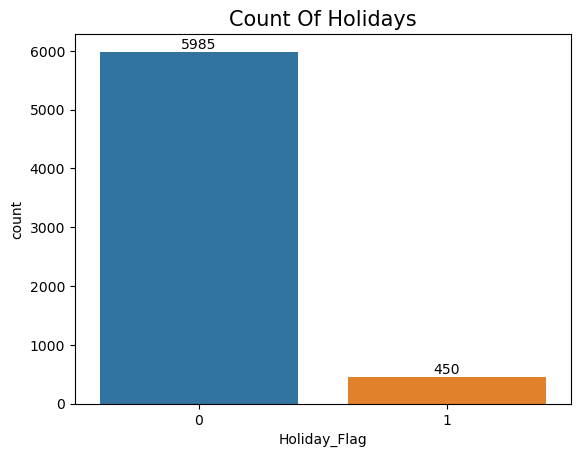

In [11]:
ax=sns.countplot(data=data,x='Holiday_Flag')
ax.bar_label(ax.containers[0])
plt.title("Count Of Holidays",fontsize=15)
plt.show()

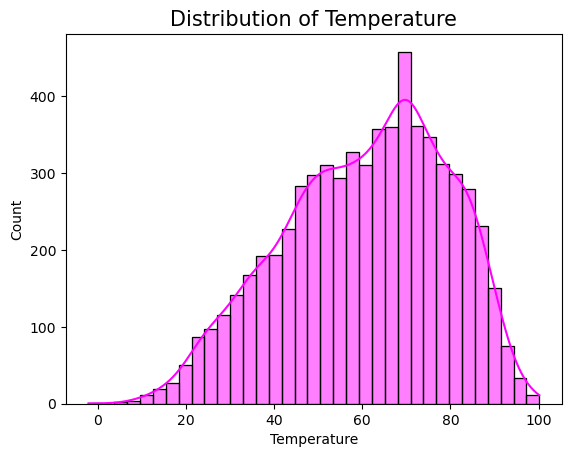

In [12]:
sns.histplot(data=data,x='Temperature',kde=True,color='magenta')
plt.title("Distribution of Temperature",fontsize=15)
plt.show()

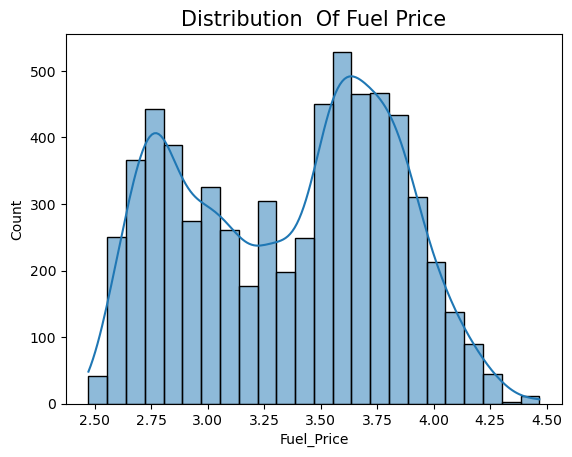

In [13]:
sns.histplot(data=data,x='Fuel_Price',kde=True)
plt.title("Distribution  Of Fuel Price",fontsize=15)
plt.show()

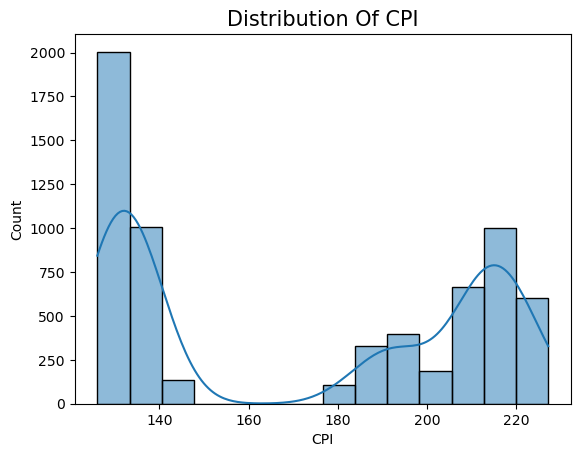

In [14]:
sns.histplot(data=data,x='CPI',kde=True)
plt.title("Distribution Of CPI",fontsize=15)
plt.show()

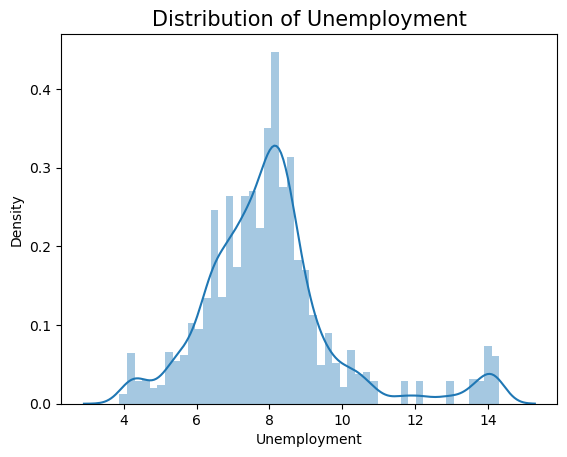

In [15]:
sns.distplot(data.Unemployment,kde=True)
plt.title('Distribution of Unemployment',fontsize=15)
plt.show()

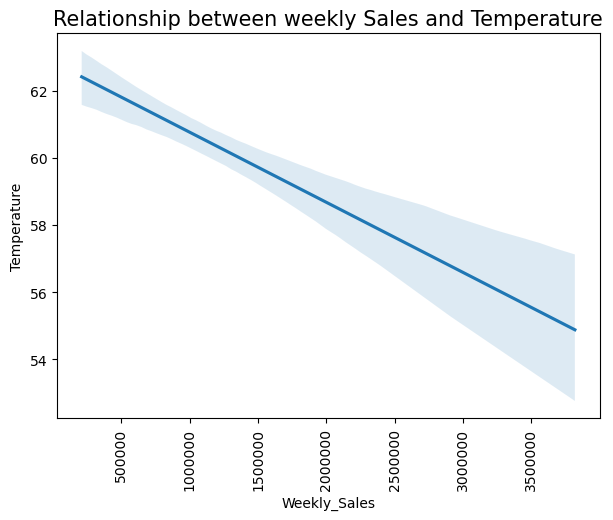

In [16]:
plt.figure(figsize=(7,5))
sns.regplot(data=data,x='Weekly_Sales',y='Temperature',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation=90)
plt.title('Relationship between weekly Sales and Temperature',fontsize=15)
plt.show()

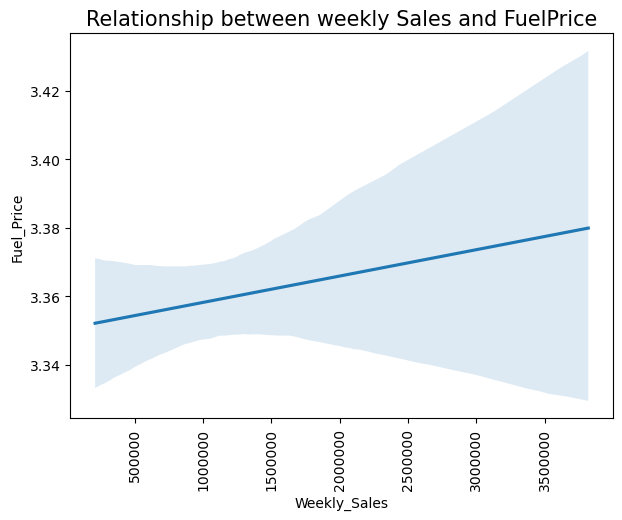

In [17]:
plt.figure(figsize=(7,5))
sns.regplot(data=data,x='Weekly_Sales',y='Fuel_Price',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation=90)
plt.title('Relationship between weekly Sales and FuelPrice',fontsize=15)
plt.show()

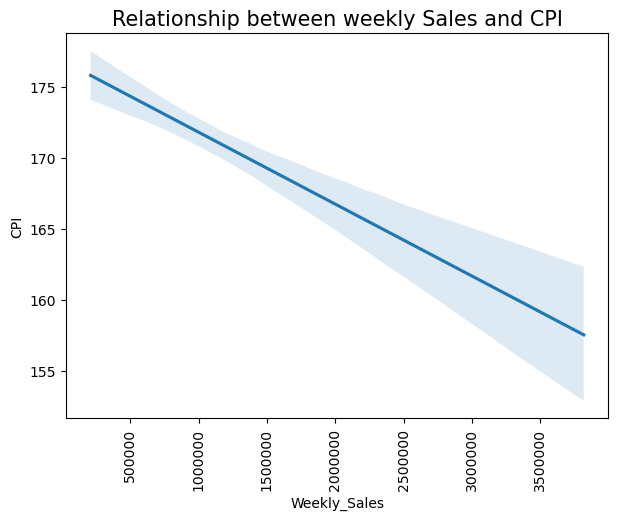

In [18]:
plt.figure(figsize=(7,5))
sns.regplot(data=data,x='Weekly_Sales',y='CPI',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation=90)
plt.title('Relationship between weekly Sales and CPI',fontsize=15)
plt.show()

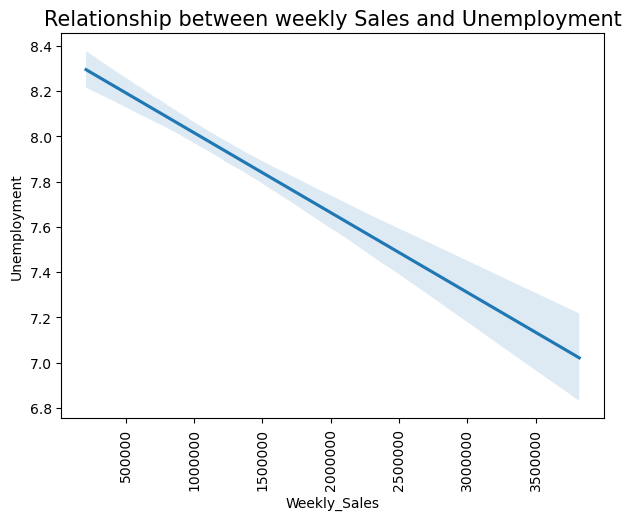

In [19]:
plt.figure(figsize=(7,5))
sns.regplot(data=data,x='Weekly_Sales',y='Unemployment',scatter=False)
plt.ticklabel_format(useOffset=False,style='plain',axis='x')
plt.xticks(rotation=90)
plt.title('Relationship between weekly Sales and Unemployment',fontsize=15)
plt.show()

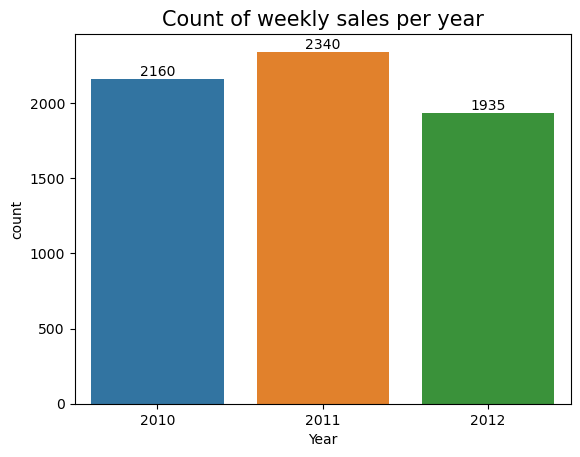

In [20]:
data['Year']=data['Date'].dt.year
ax=sns.countplot(data=data,x='Year')
ax.bar_label(ax.containers[0])
plt.title("Count of weekly sales per year",fontsize=15)
plt.show()

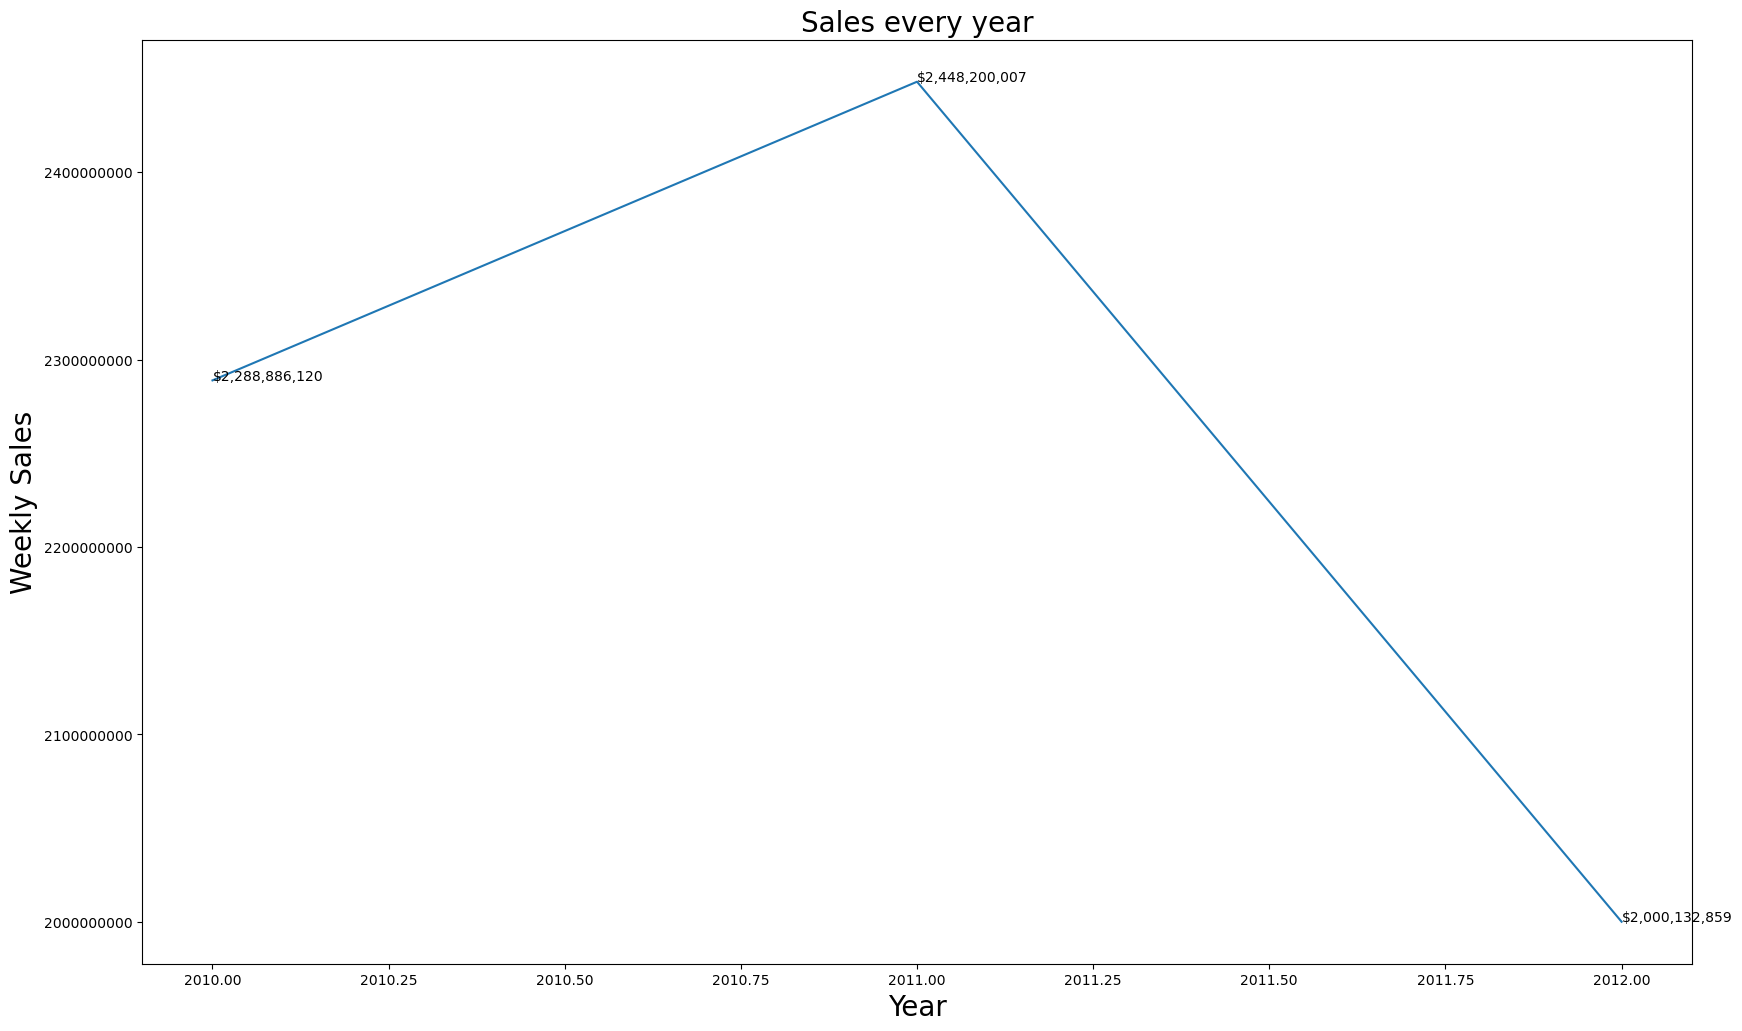

In [21]:
v0 = data.groupby('Year')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize = (20,12))
ax = sns.lineplot(data=v0,x = 'Year',y = 'Weekly_Sales')
for x,y in zip(v0['Year'],v0['Weekly_Sales']):
    plt.text(x = x, y = y, s = '${:,.0f}'.format(y)) 


plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Sales every year",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Weekly Sales",fontsize=20)
plt.show()


# YEAR 2010

In [22]:
data_2010=data[data['Year']==2010].sort_values(by='Month')
data_2010.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3323     24 2010-01-10    1215273.20             0        66.88       2.840   
1607     12 2010-01-10     850936.26             0        85.20       3.001   
34        1 2010-01-10    1453329.50             0        71.89       2.603   
5611     40 2010-01-10     891152.33             0        62.01       2.717   
3895     28 2010-01-10    1203080.41             0        85.20       3.001   

             CPI  Unemployment Month_name  Week  Month  Year  
3323  132.756800         8.275    January     1      1  2010  
1607  126.234600        14.313    January     1      1  2010  
34    211.671989         7.838    January     1      1  2010  
5611  132.756800         5.287    January     1      1  2010  
3895  126.234600        14.313    January     1      1  2010

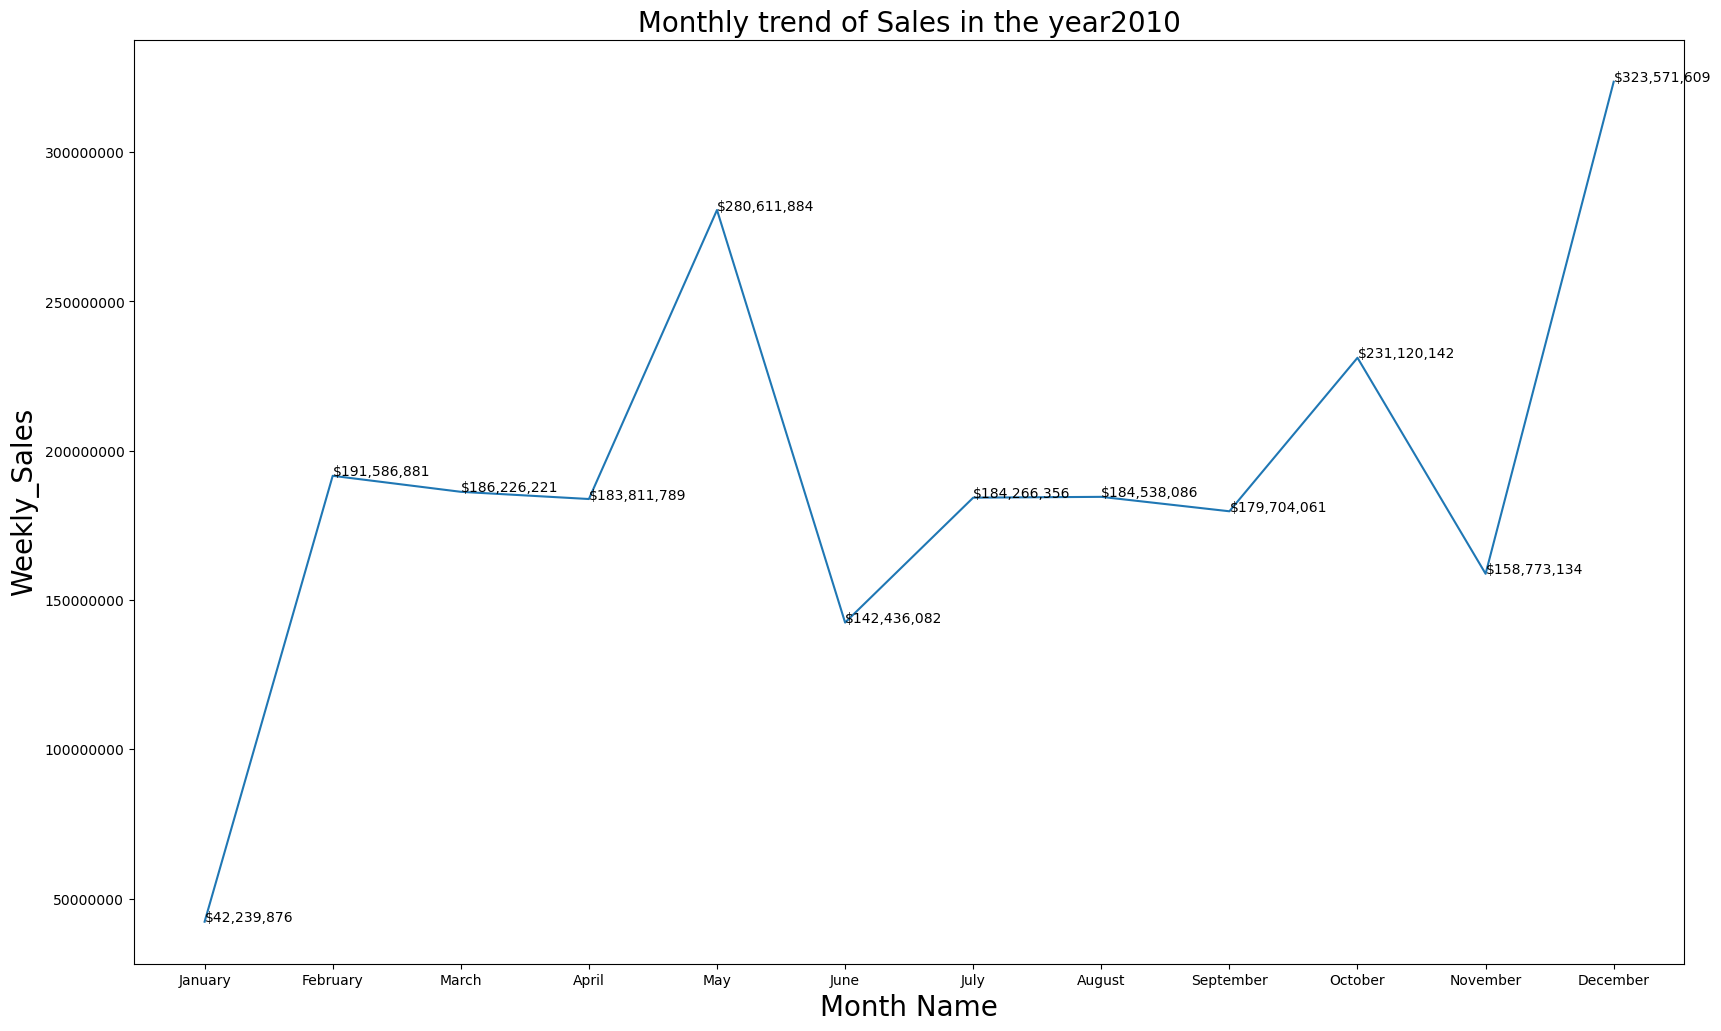

In [23]:
v1=data_2010.groupby(['Month_name','Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Month')
plt.figure(figsize=(20,12))
ax=sns.lineplot(data=v1,x='Month_name',y='Weekly_Sales')
for x,y in zip(v1['Month_name'],v1['Weekly_Sales']):
    plt.text(x=x, y=y, s='${:,.0f}'.format(y))
    
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.xlabel("Month Name",fontsize=20)
plt.ylabel("Weekly_Sales",fontsize=20)
plt.title(" Monthly trend of Sales in the year2010 ",fontsize=20)
plt.show()

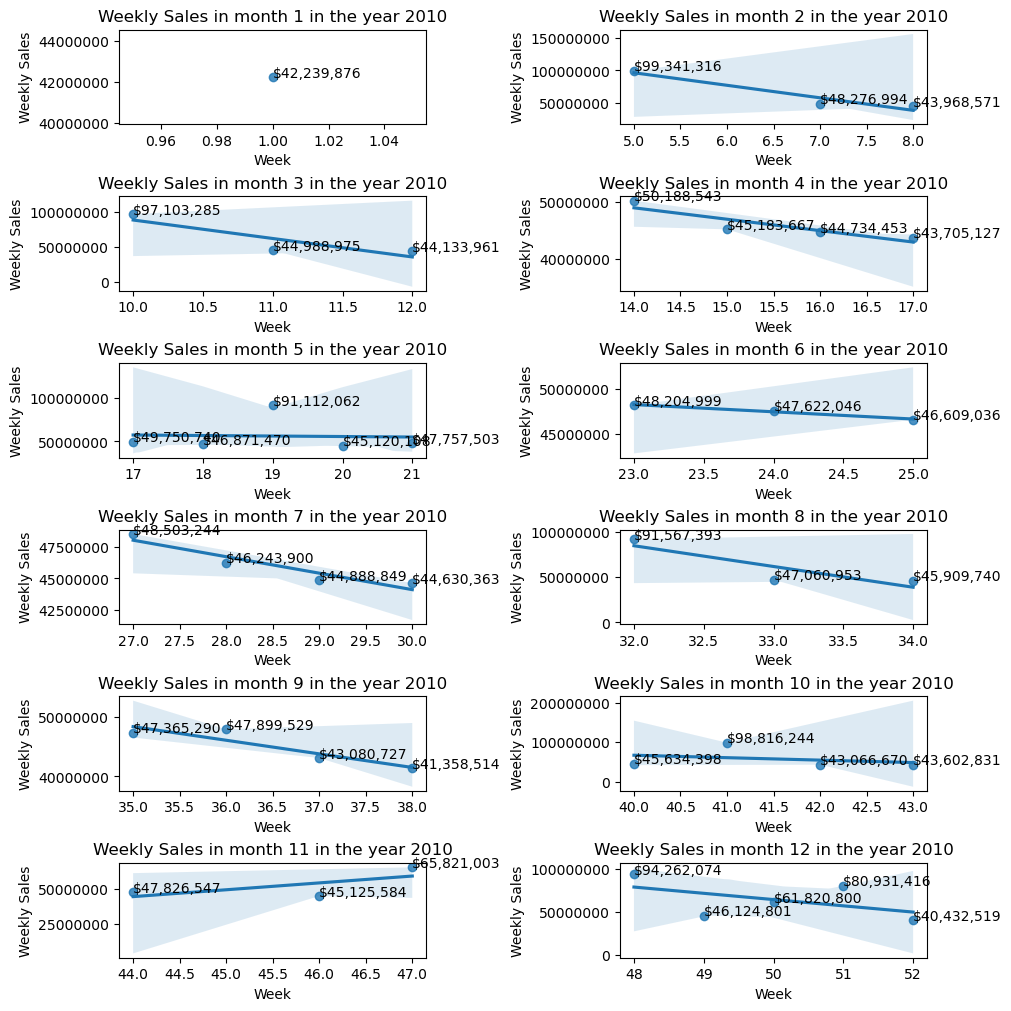

In [24]:
plt.subplots(6,2,figsize=(10,10),constrained_layout='True')

for i in range(1,13):
    mth = data_2010[data_2010['Month']==i]
    week = mth.groupby('Week')['Weekly_Sales'].sum().reset_index()
    plt.subplot(6,2,i)
    ax = sns.regplot(data=week,x='Week',y = 'Weekly_Sales')
    for x,y in zip(week['Week'],week['Weekly_Sales']):
        plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title(f'Weekly Sales in month {i} in the year 2010')
    plt.ylabel("Weekly Sales")
plt.show()

YEAR 2011

In [25]:
data_2011=data[data['Year']==2011].sort_values(by='Month')
data_2011.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3219     23 2011-01-07    1492507.44             0        65.65       3.815   
2062     15 2011-01-04     542556.05             0        30.34       3.811   
4636     33 2011-01-04     232769.09             0        71.41       3.772   
5936     42 2011-01-07     506343.83             0        95.36       3.842   
2053     15 2011-01-28     481119.60             0        19.61       3.402   

             CPI  Unemployment Month_name  Week  Month  Year  
3219  135.446800         4.584    January     1      1  2011  
2062  134.068258         7.658    January     1      1  2011  
4636  128.719935         8.687    January     1      1  2011  
5936  129.089400         8.257    January     1      1  2011  
2053  133.105968         7.771    January     4      1  2011

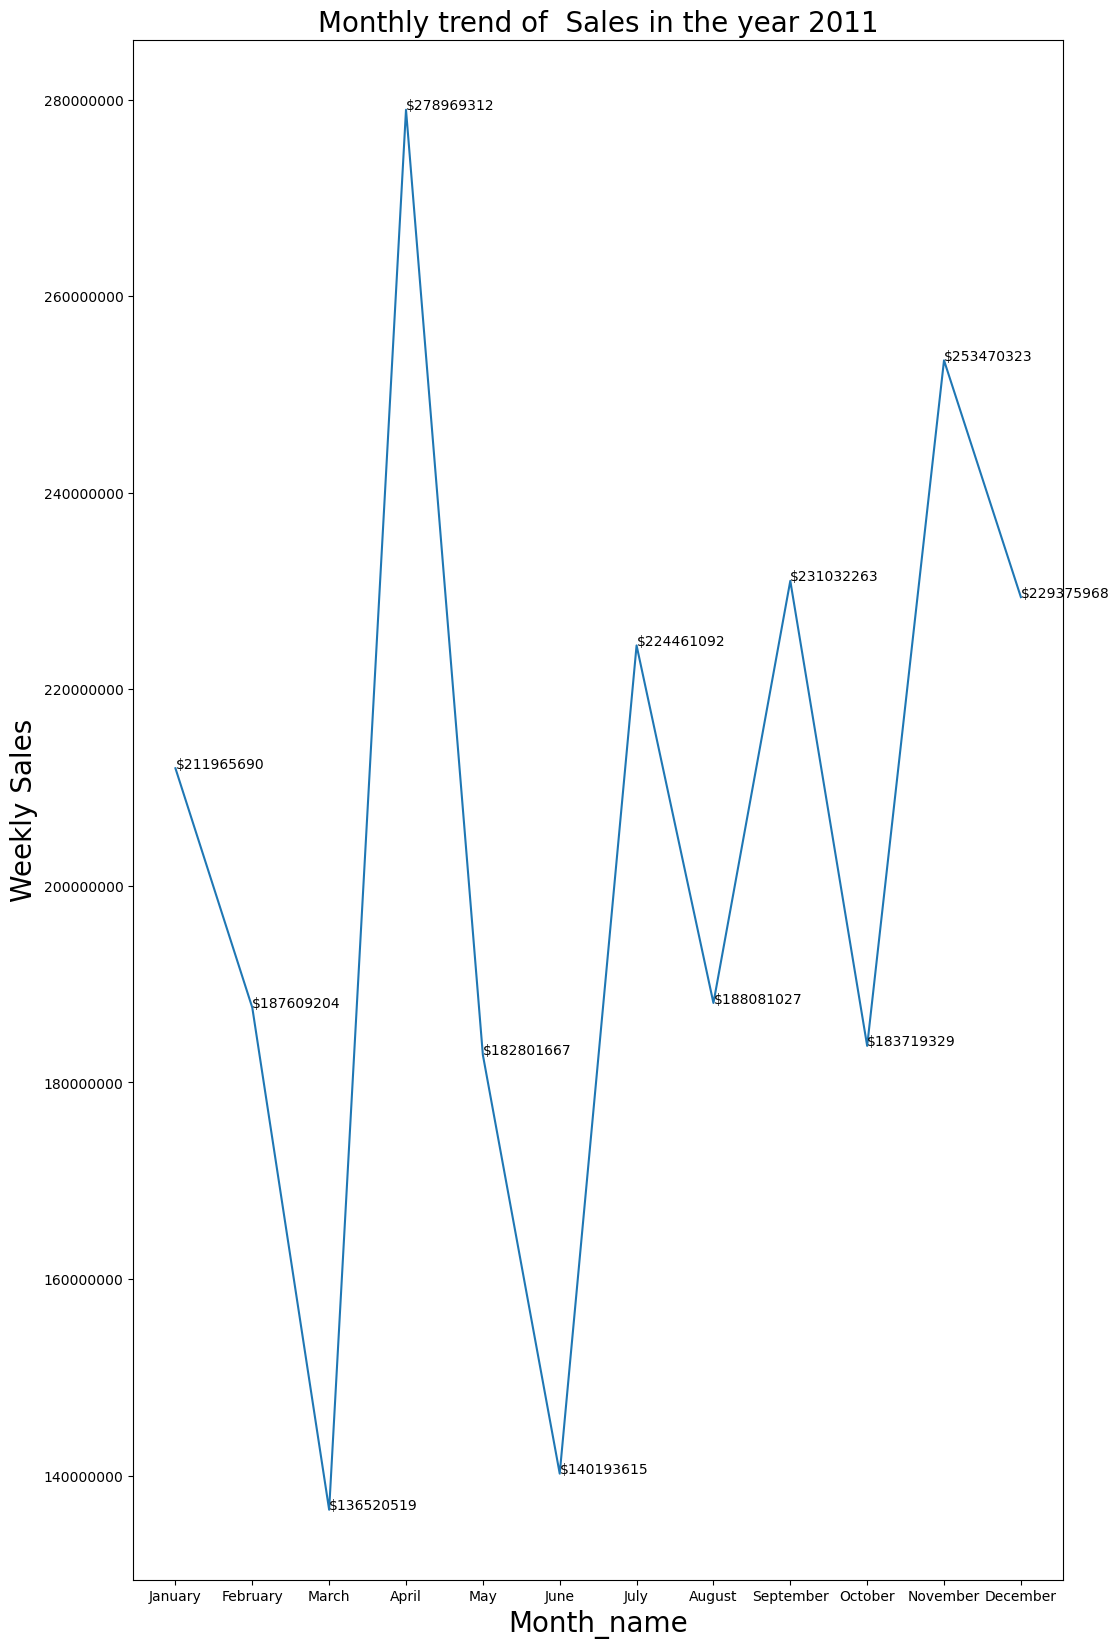

In [26]:
v2=data_2011.groupby(['Month_name','Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Month')
plt.figure(figsize=(12,20))
ax=sns.lineplot(data=v2,x='Month_name',y='Weekly_Sales')
for x,y in zip(v2['Month_name'],v2['Weekly_Sales']):
    plt.text(x=x,y=y,s='${:.0f}'.format(y))
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title("Monthly trend of  Sales in the year 2011",fontsize=20)
plt.xlabel("Month_name",fontsize=20)
plt.ylabel("Weekly Sales",fontsize=20)
plt.show()

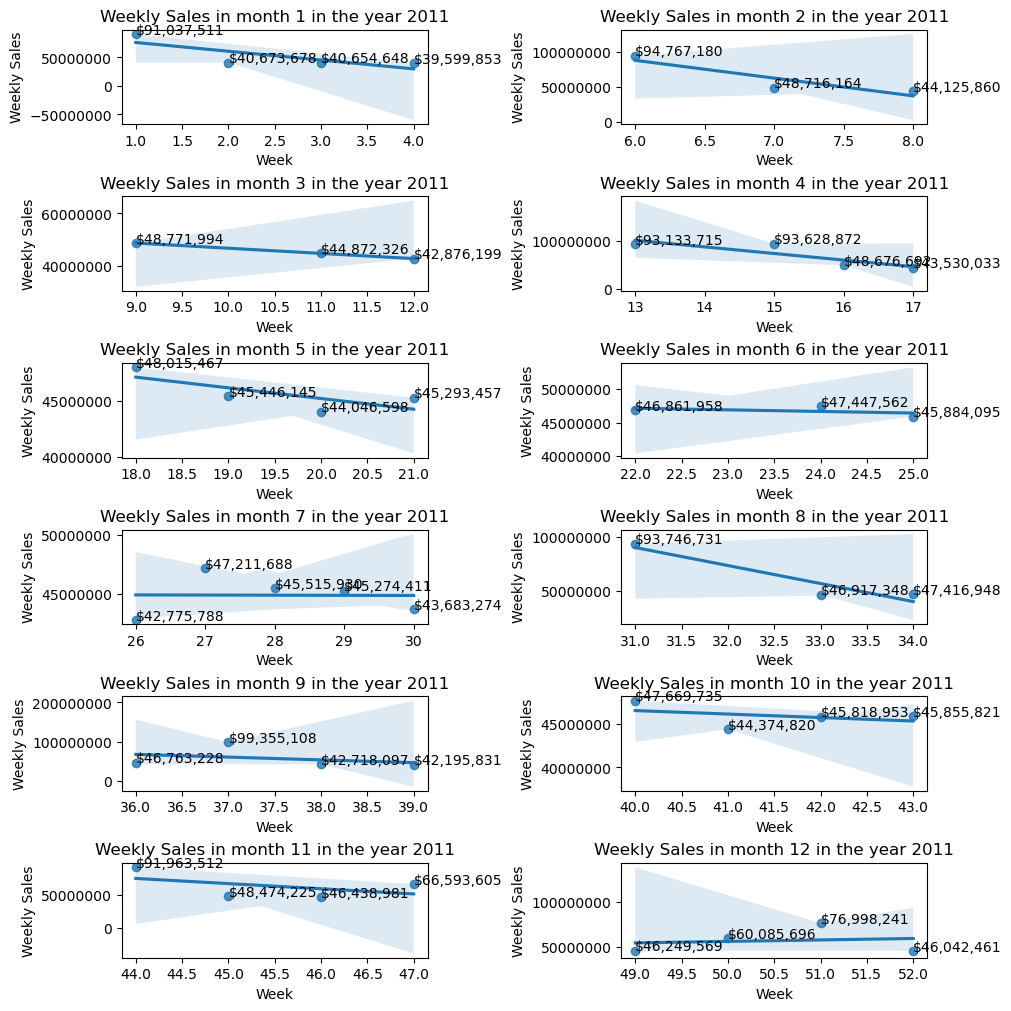

In [27]:
plt.subplots(6,2,figsize=(10,10),constrained_layout='True')
for i in range(1,13):
    mth = data_2011[data_2011['Month']==i]
    week = mth.groupby('Week')['Weekly_Sales'].sum().reset_index()
    plt.subplot(6,2,i)
    ax = sns.regplot(data=week,x='Week',y = 'Weekly_Sales')
    for x,y in zip(week['Week'],week['Weekly_Sales']):
        plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title(f'Weekly Sales in month {i} in the year 2011')
    plt.ylabel("Weekly Sales")
plt.show()

# YEAR 2012

In [28]:
data_2012=data[data['Year']==2012].sort_values(by='Month')
data_2012.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3267     23 2012-01-06    1476144.34             0        66.22       3.798   
2104     15 2012-01-20     492721.85             0        21.39       3.705   
2103     15 2012-01-13     454183.42             0        36.26       3.666   
2695     19 2012-01-06    1450733.29             0        68.18       3.915   
4554     32 2012-01-06    1157557.79             0        62.84       3.764   

             CPI  Unemployment Month_name  Week  Month  Year  
3267  138.113807         4.125    January     1      1  2012  
2104  136.856419         7.943    January     3      1  2012  
2103  136.753000         7.943    January     2      1  2012  
2695  138.113807         8.150    January     1      1  2012  
4554  197.621895         8.090    January     1      1  2012

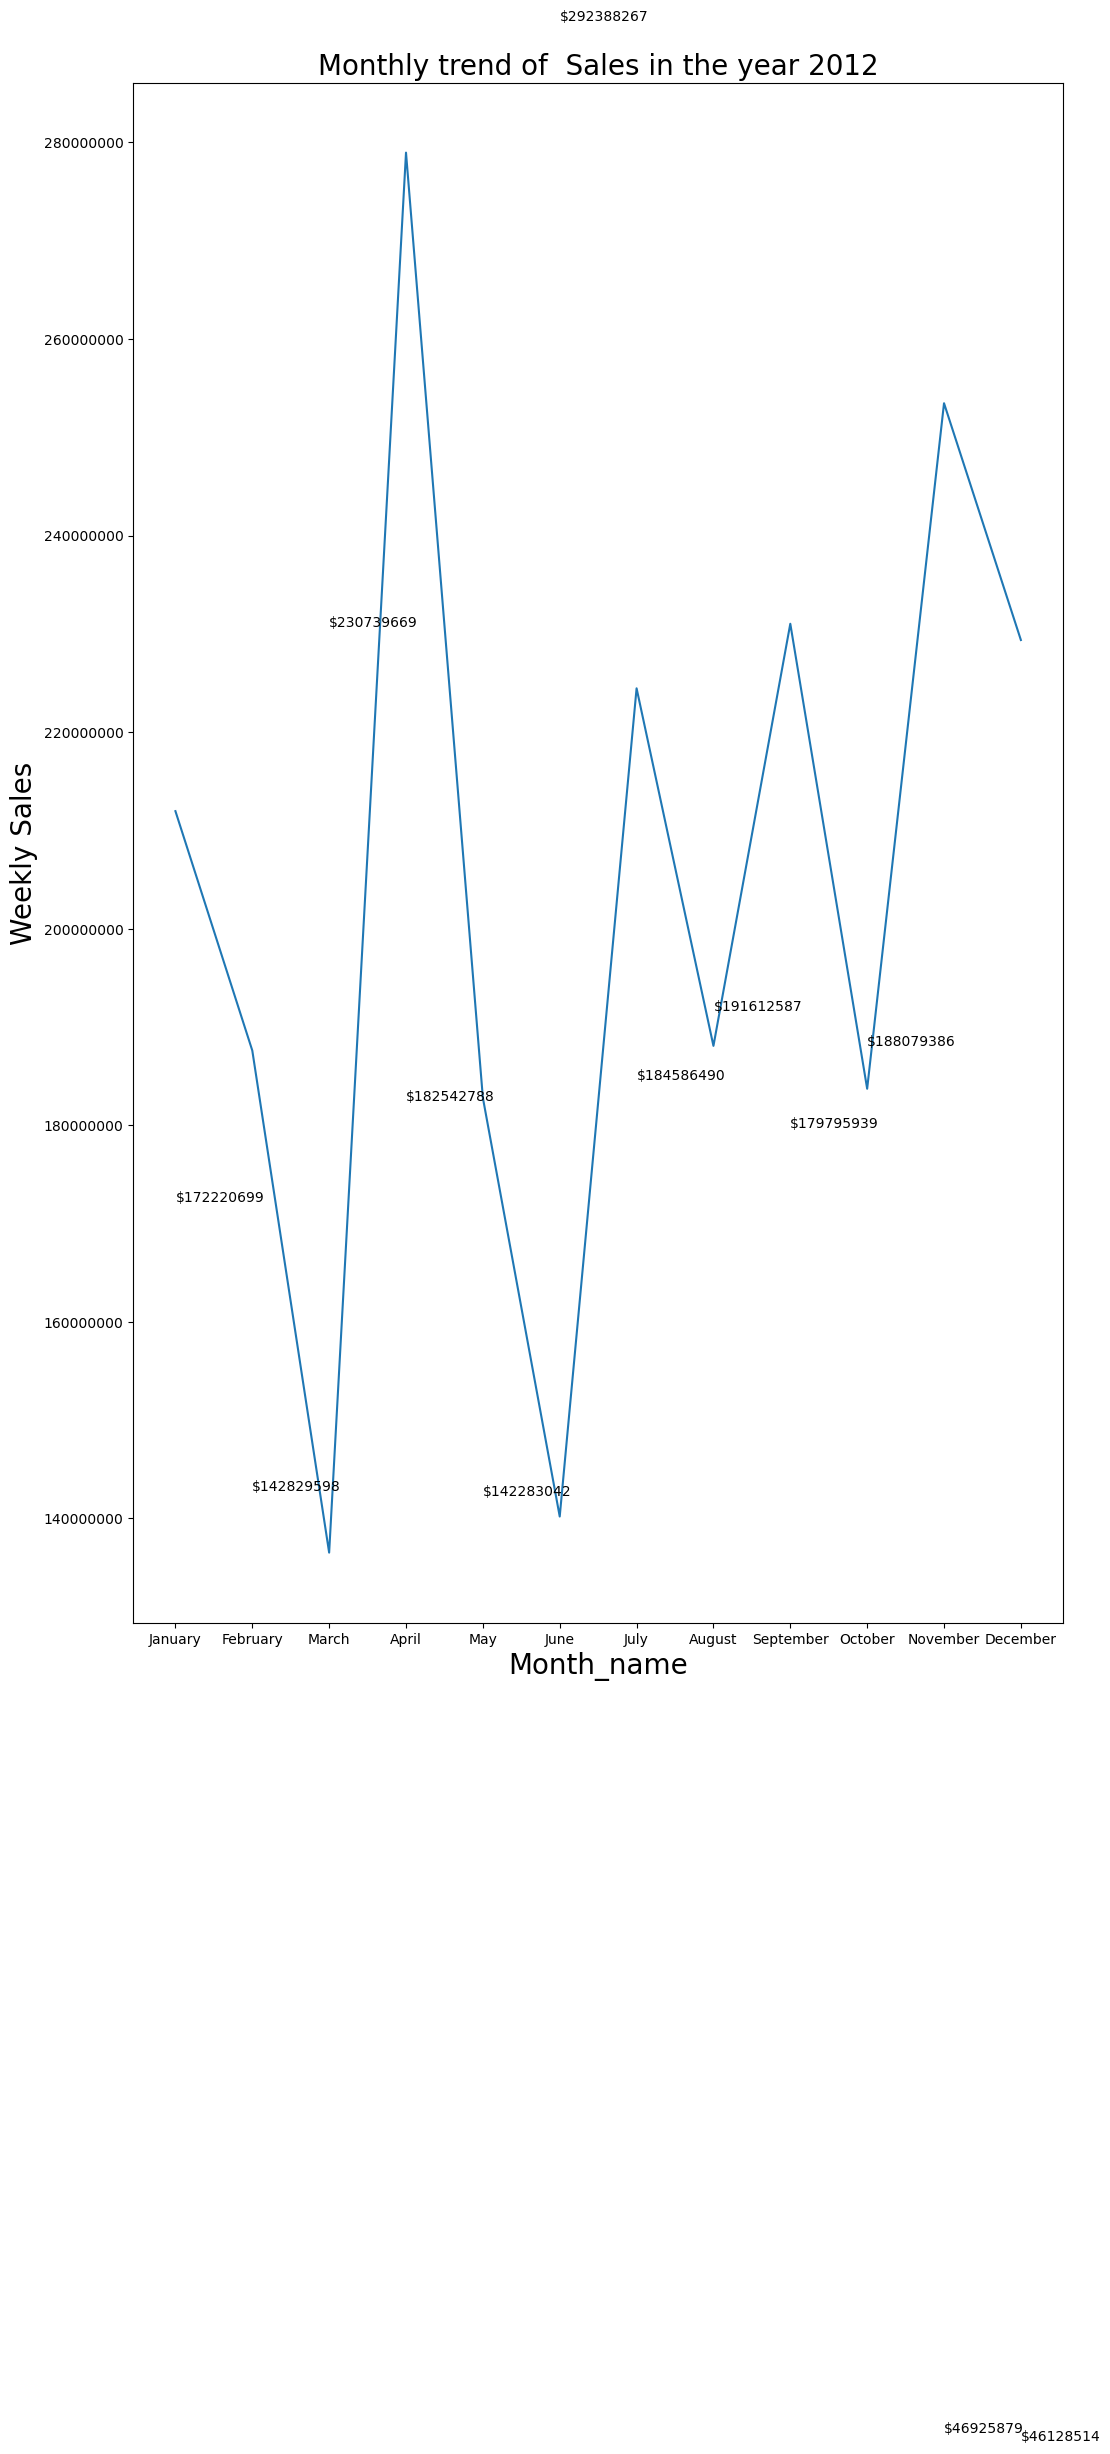

In [29]:
v3=data_2012.groupby(['Month_name','Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Month')
plt.figure(figsize=(12,20))
ax=sns.lineplot(data=v2,x='Month_name',y='Weekly_Sales')
for x,y in zip(v3['Month_name'],v3['Weekly_Sales']):
    plt.text(x=x,y=y,s='${:.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title("Monthly trend of  Sales in the year 2012",fontsize=20)
    plt.xlabel("Month_name",fontsize=20)
    plt.ylabel("Weekly Sales",fontsize=20)
plt.show()

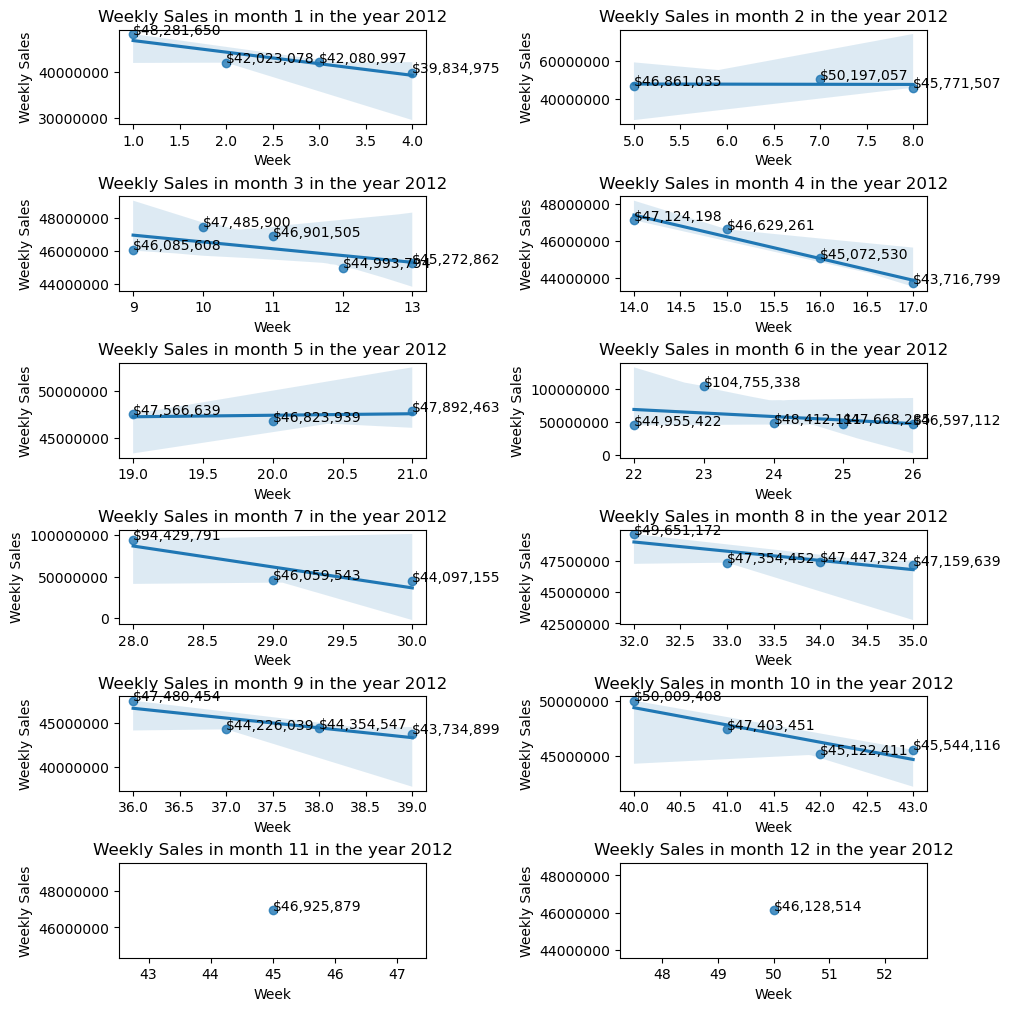

In [30]:
plt.subplots(6,2,figsize=(10,10),constrained_layout='True')
for i in range(1,13):
    mth = data_2012[data_2012['Month']==i]
    week = mth.groupby('Week')['Weekly_Sales'].sum().reset_index()
    plt.subplot(6,2,i)
    ax = sns.regplot(data=week,x='Week',y = 'Weekly_Sales')
    for x,y in zip(week['Week'],week['Weekly_Sales']):
        plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
    plt.ticklabel_format(useOffset=False,style='plain',axis='y')
    plt.title(f'Weekly Sales in month {i} in the year 2012')
    plt.ylabel("Weekly Sales")
plt.show()

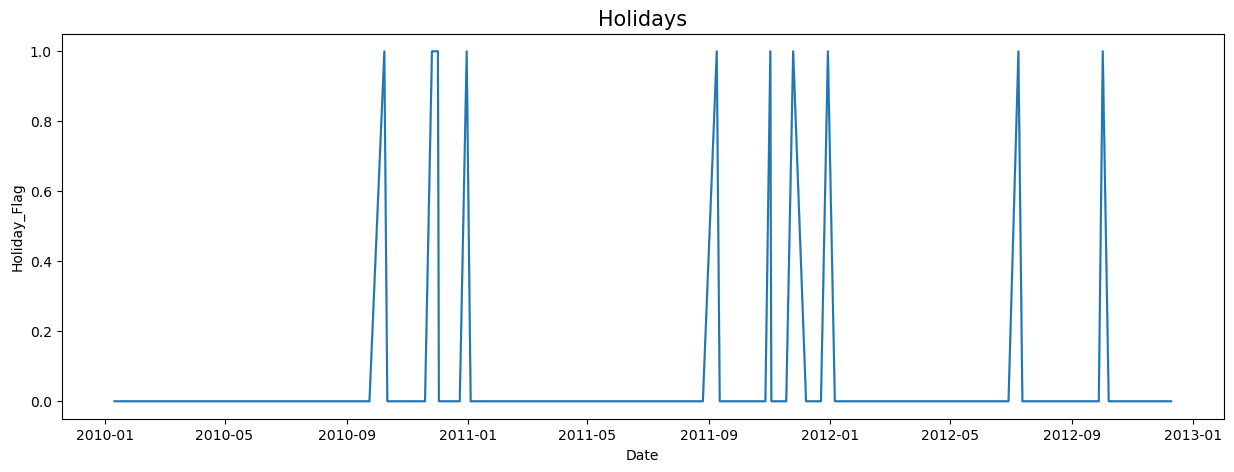

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='Date',y='Holiday_Flag')
plt.title("Holidays",fontsize=15)
plt.show()

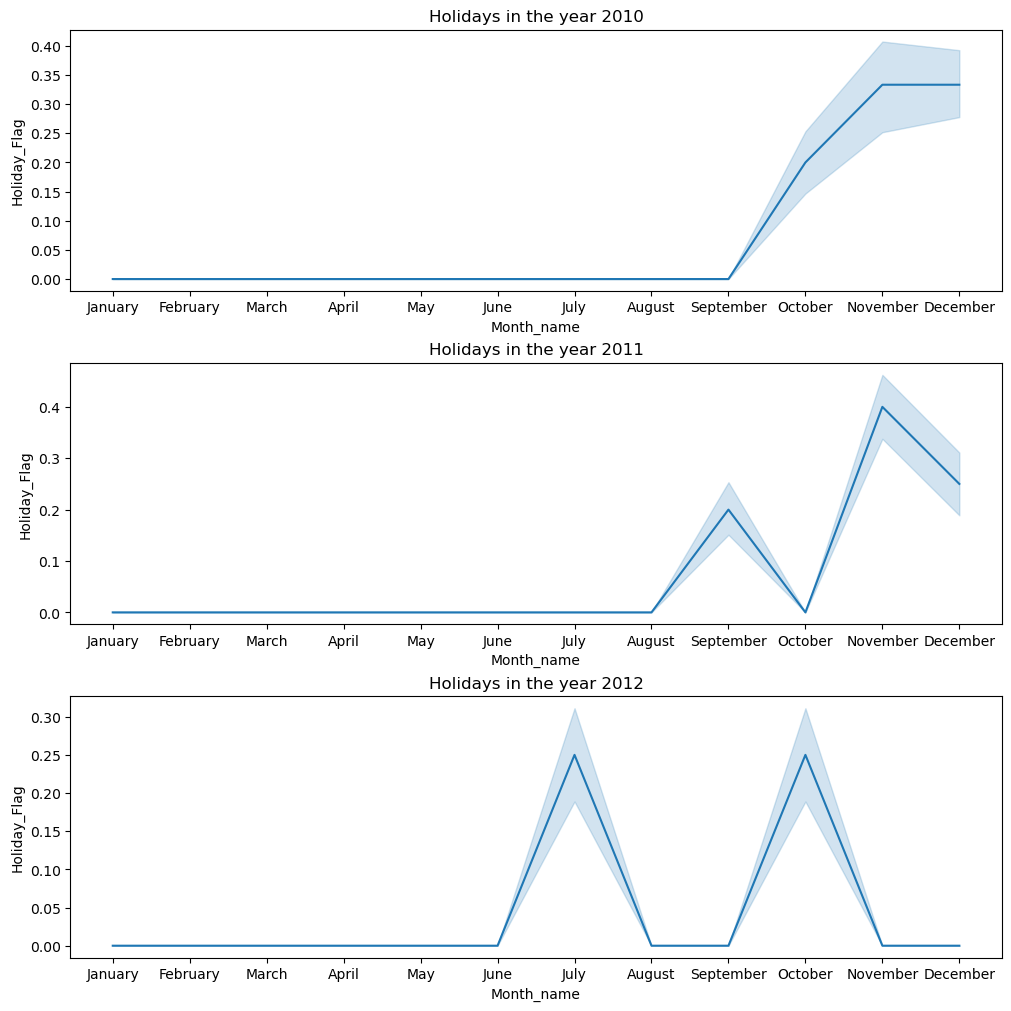

In [32]:
plt.subplots(3,1,figsize=(10,10),constrained_layout=True)
plt.subplot(3,1,1)
sns.lineplot(data=data_2010,x="Month_name",y="Holiday_Flag")
plt.title("Holidays in the year 2010")

plt.subplot(3,1,2)
sns.lineplot(data=data_2011,x="Month_name",y="Holiday_Flag")
plt.title("Holidays in the year 2011")

plt.subplot(3,1,3)
sns.lineplot(data=data_2012,x="Month_name",y="Holiday_Flag")
plt.title("Holidays in the year 2012")

plt.show()

# TEMPERATURE

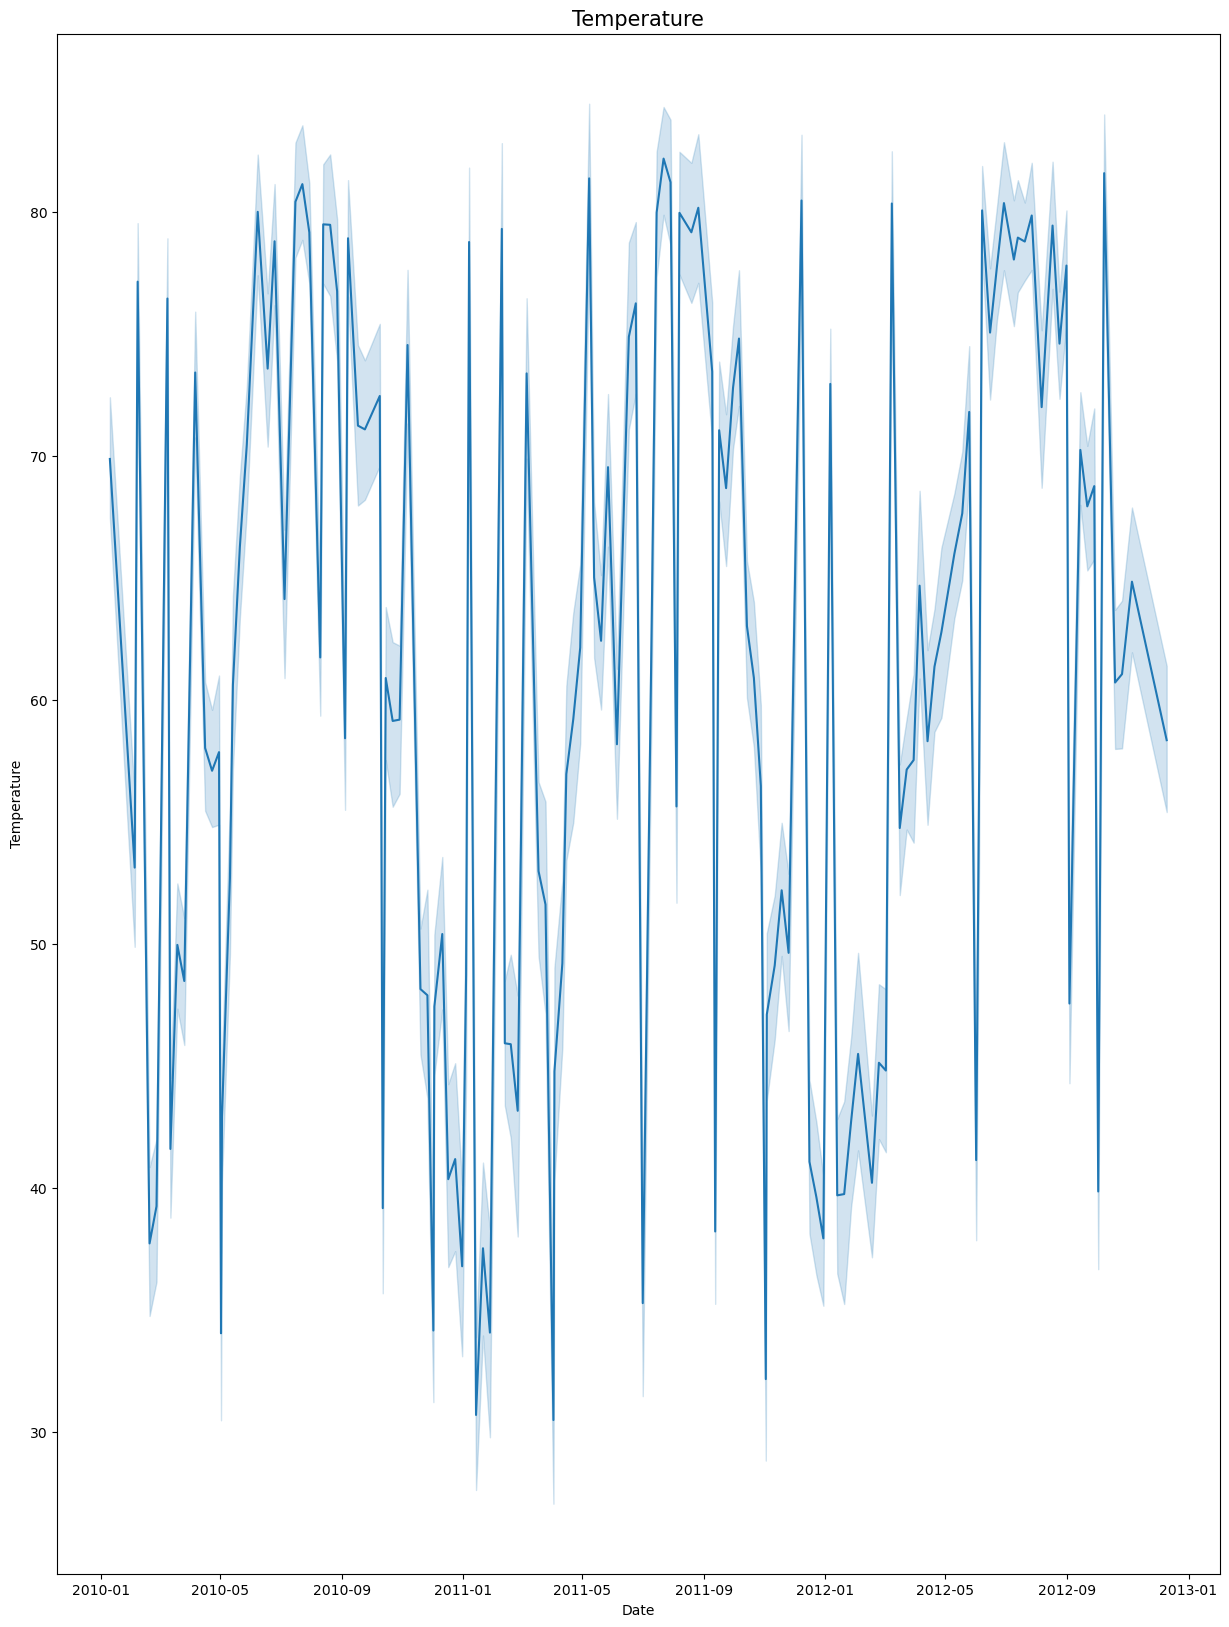

In [33]:
plt.figure(figsize=(15,20))
sns.lineplot(data=data,x="Date",y="Temperature")
plt.title("Temperature",fontsize=15)
plt.show()

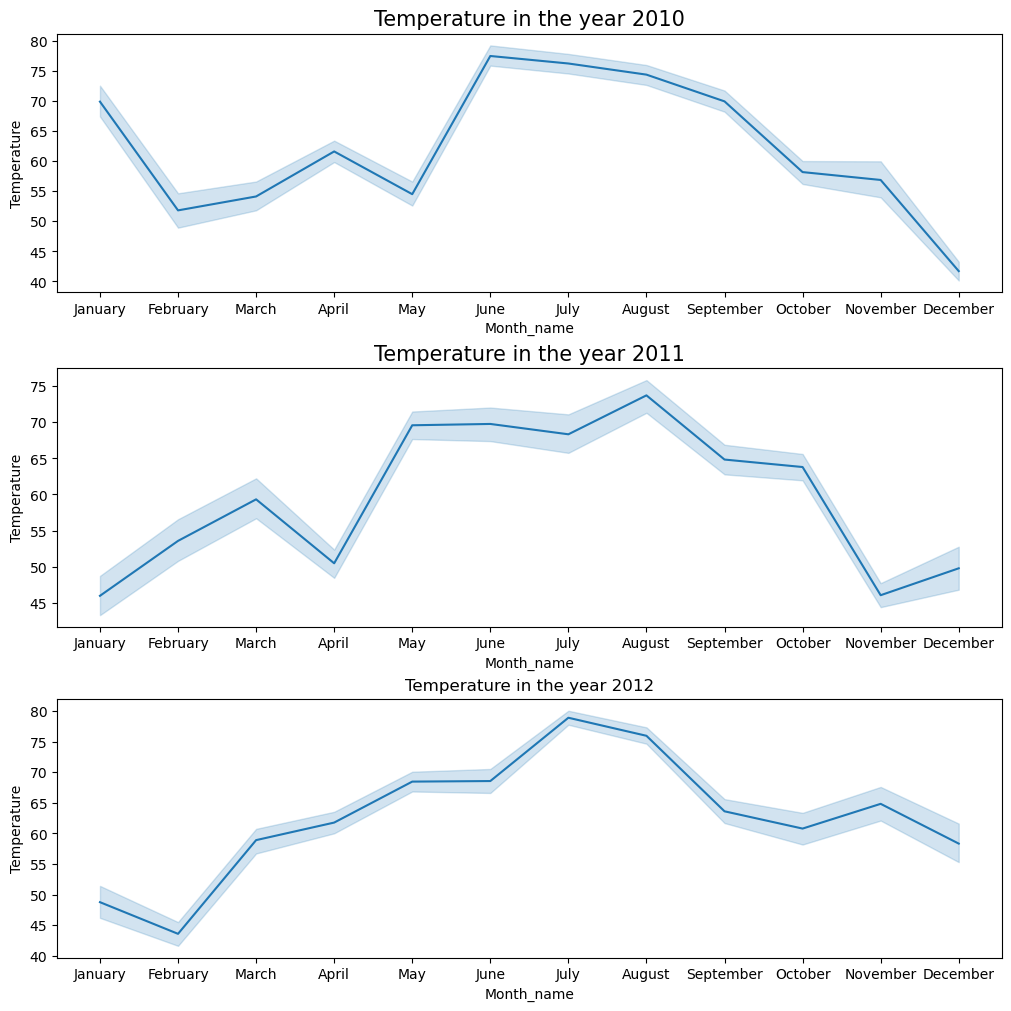

In [34]:
plt.subplots(3,1,figsize=(10,10),constrained_layout=True)
plt.subplot(3,1,1)
sns.lineplot(data=data_2010,x="Month_name",y="Temperature")
plt.title("Temperature in the year 2010",fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=data_2011,x="Month_name",y="Temperature")
plt.title('Temperature in the year 2011',fontsize=15)

plt.subplot(3,1,3)
sns.lineplot(data=data_2012,x="Month_name",y="Temperature")
plt.title("Temperature in the year 2012")
plt.show()


# Fuel_Price

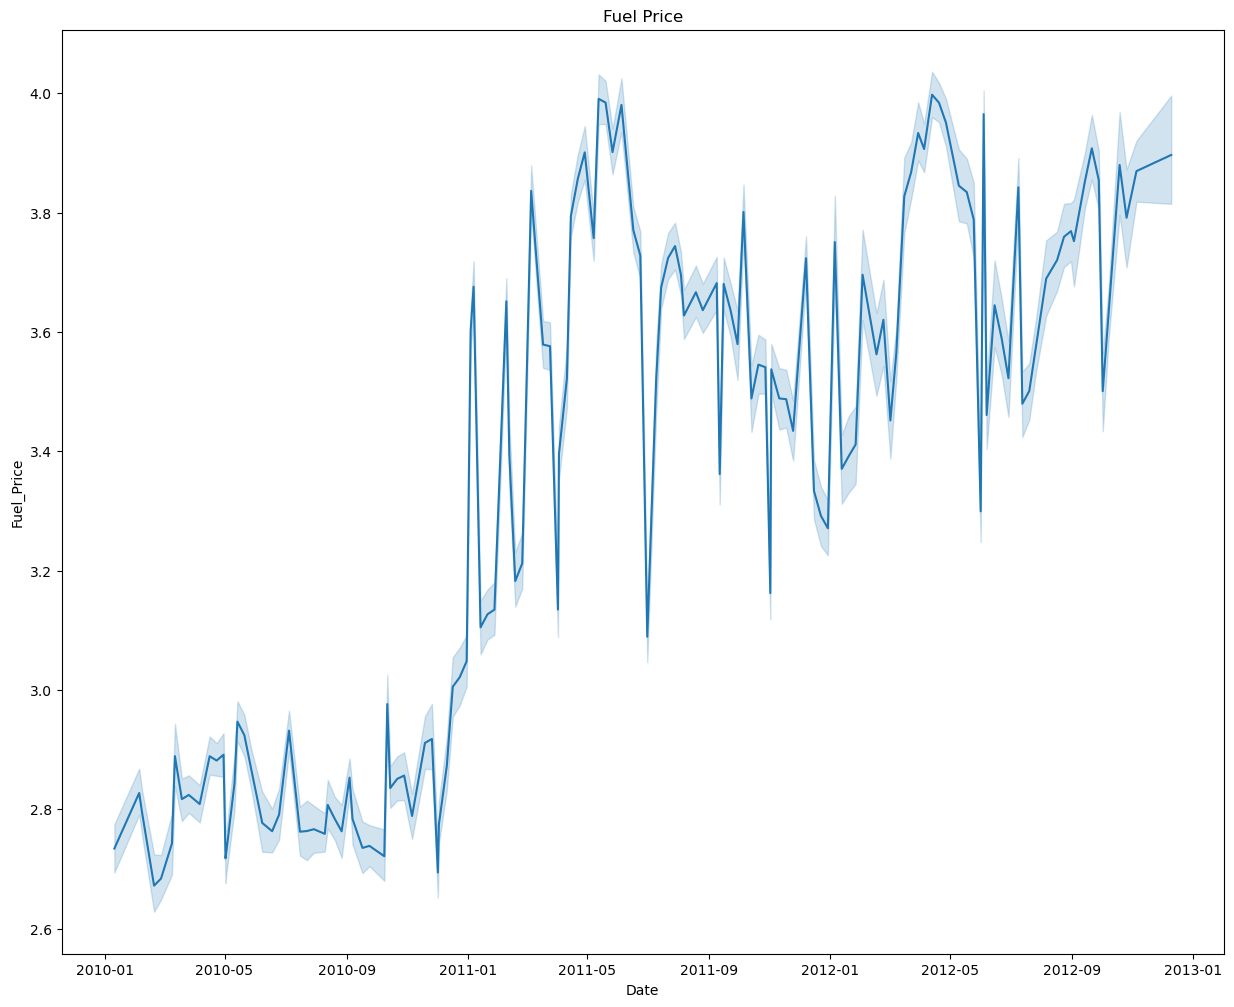

In [35]:
plt.figure(figsize=(15,12))
sns.lineplot(data=data,x="Date",y="Fuel_Price")
plt.title("Fuel Price")
plt.show()

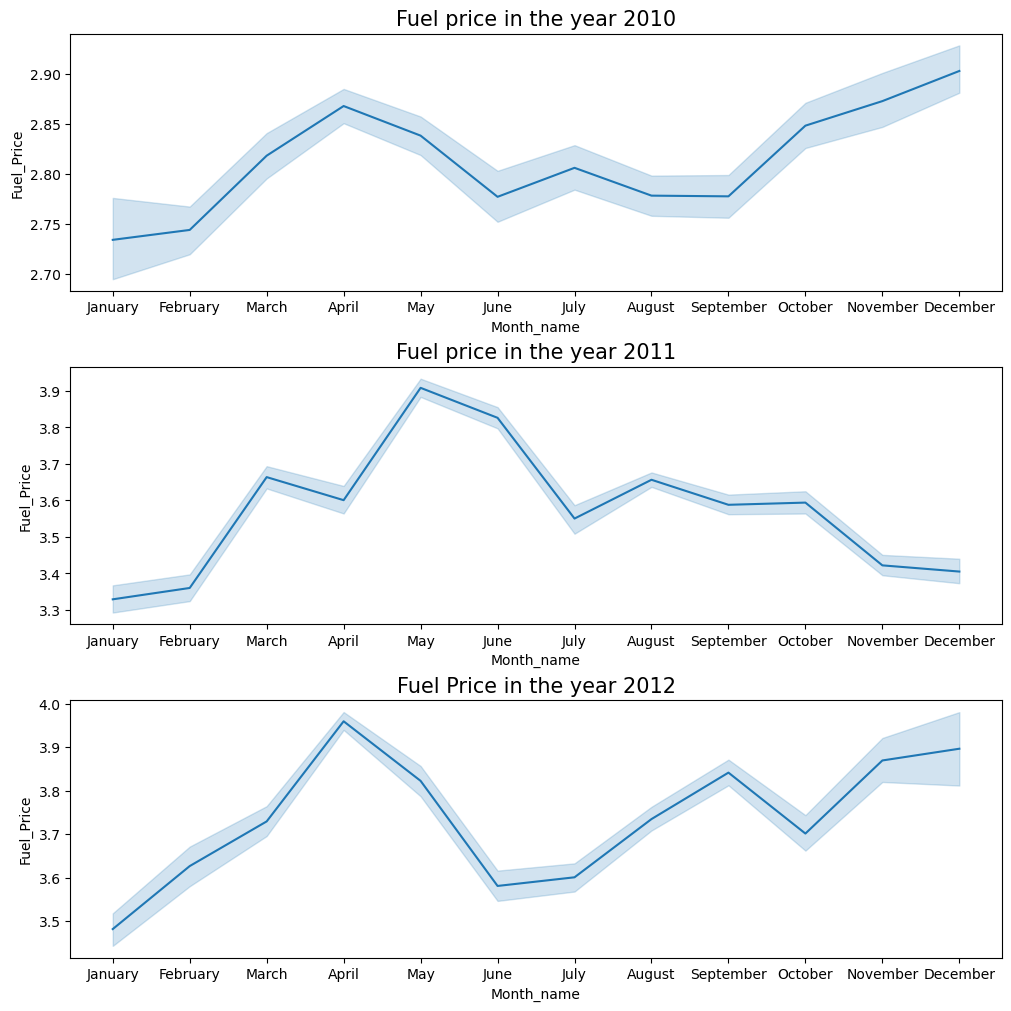

In [36]:
plt.subplots(3,1,figsize=(10,10),constrained_layout=True)
plt.subplot(3,1,1)
sns.lineplot(data=data_2010,x="Month_name",y="Fuel_Price")
plt.title("Fuel price in the year 2010",fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=data_2011,x="Month_name",y="Fuel_Price")
plt.title("Fuel price in the year 2011",fontsize=15)

plt.subplot(3,1,3)
sns.lineplot(data=data_2012,x="Month_name",y="Fuel_Price")
plt.title("Fuel Price in the year 2012",fontsize=15)

plt.show()


# CPI

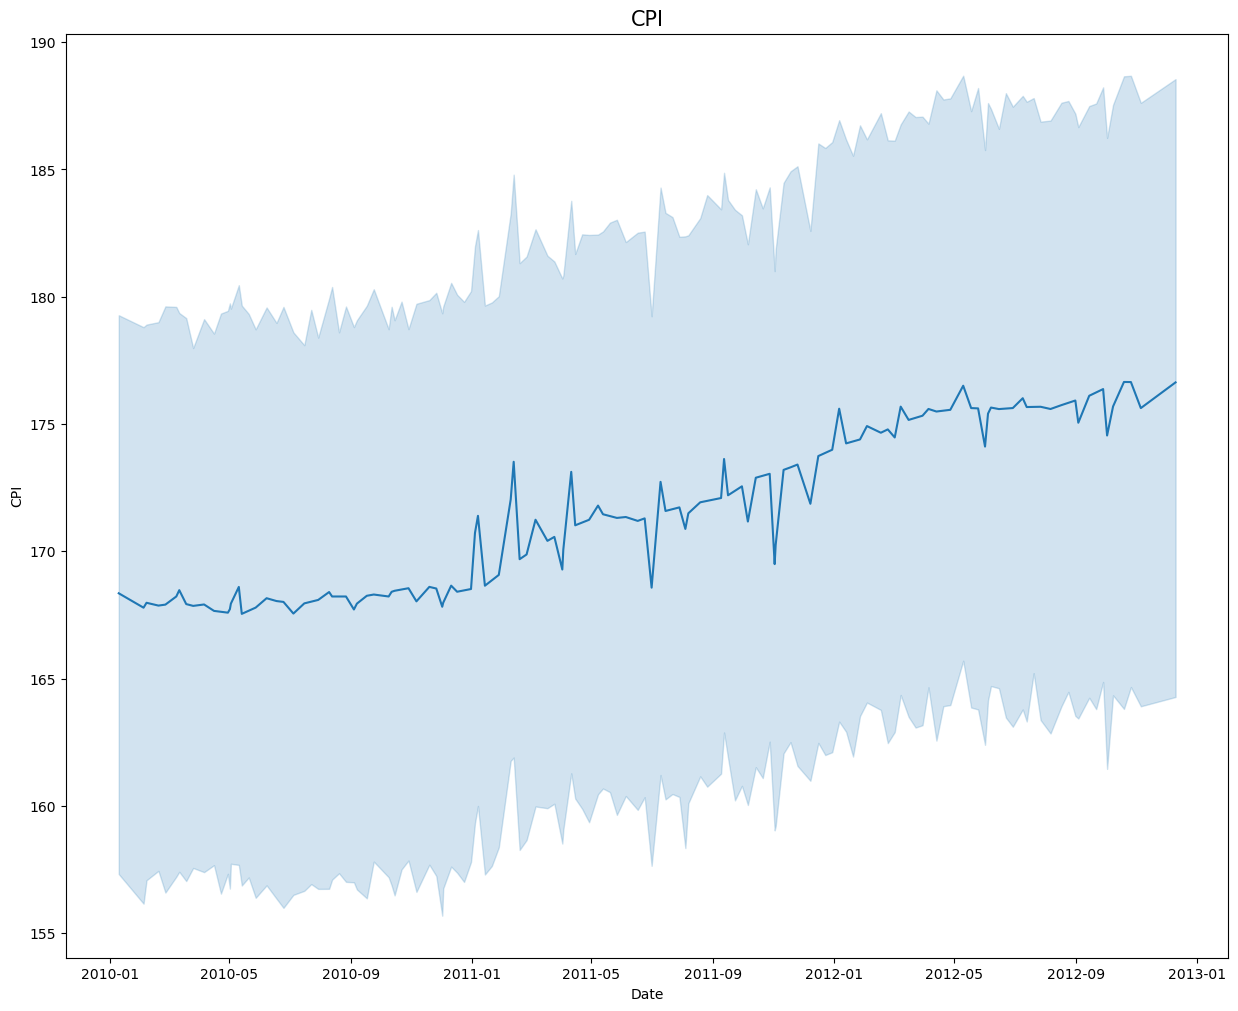

In [37]:
plt.figure(figsize=(15,12))
sns.lineplot(data=data,x="Date",y="CPI")
plt.title("CPI",fontsize=15)
plt.show()

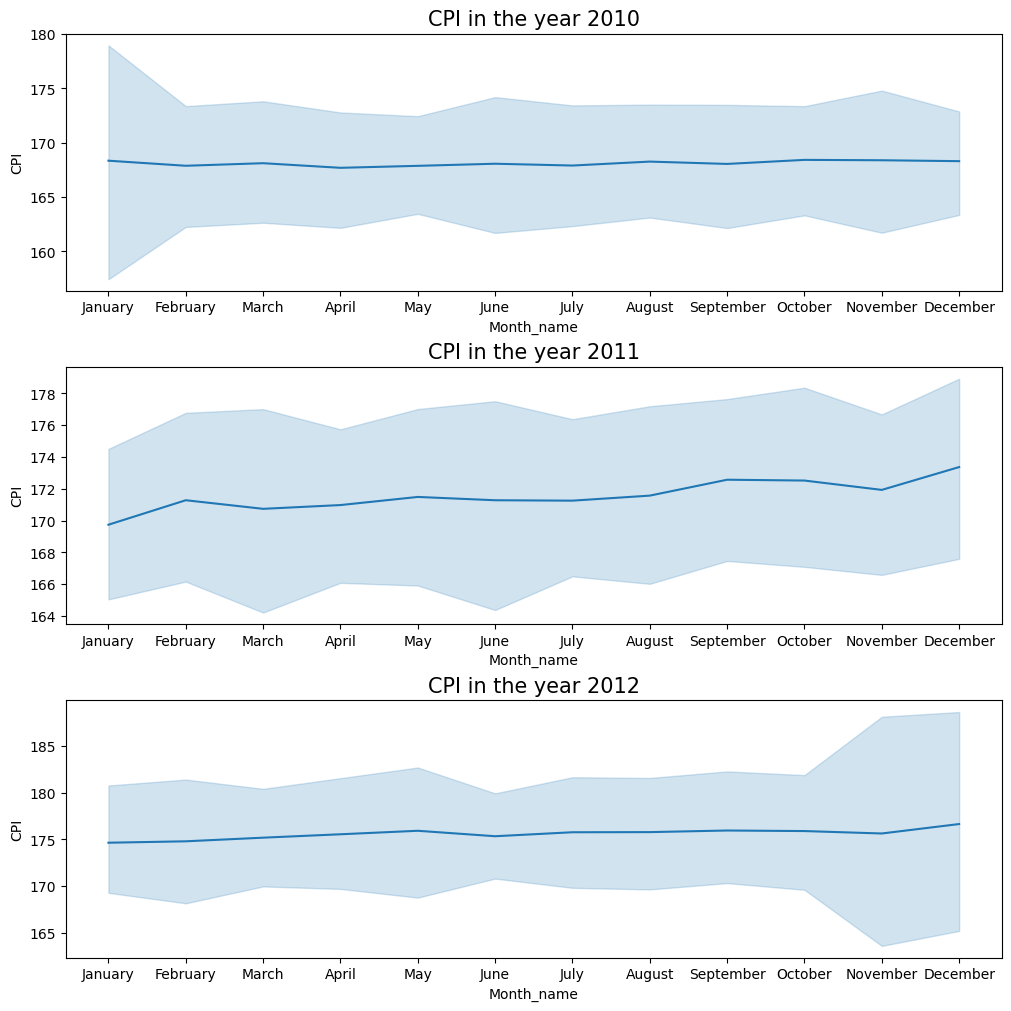

In [38]:
plt.subplots(3,1,figsize=(10,10),constrained_layout=True)
plt.subplot(3,1,1)
sns.lineplot(data=data_2010,x="Month_name",y="CPI")
plt.title("CPI in the year 2010",fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=data_2011,x="Month_name",y="CPI")
plt.title("CPI in the year 2011",fontsize=15)

plt.subplot(3,1,3)
sns.lineplot(data=data_2012,x="Month_name",y="CPI")
plt.title("CPI in the year 2012",fontsize=15)

plt.show()

# UNEMPLOYMENT

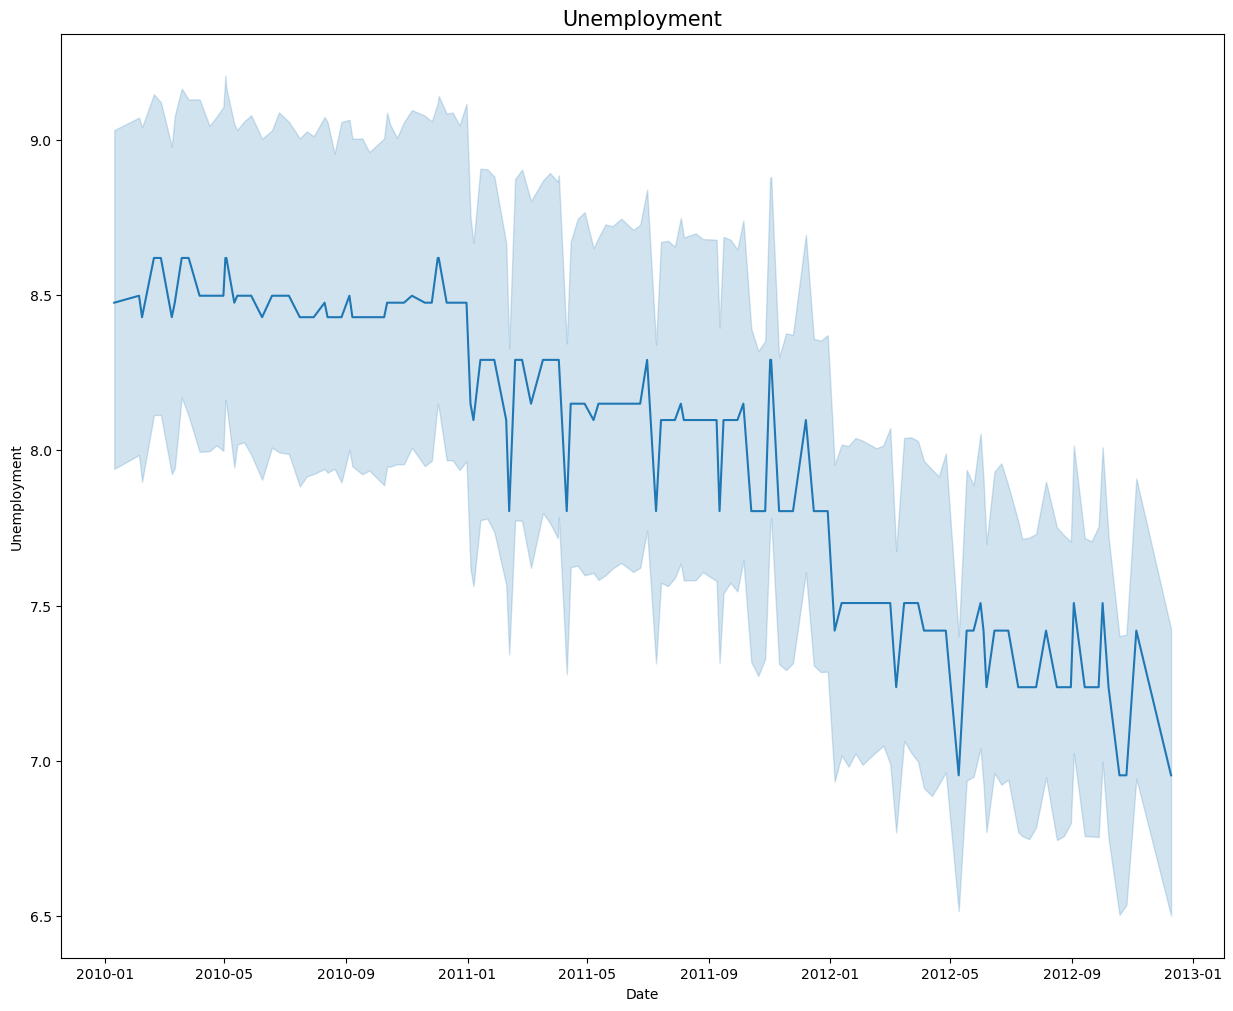

In [39]:
plt.figure(figsize=(15,12))
sns.lineplot(data=data,x="Date",y="Unemployment")
plt.title("Unemployment",fontsize=15)
plt.show()

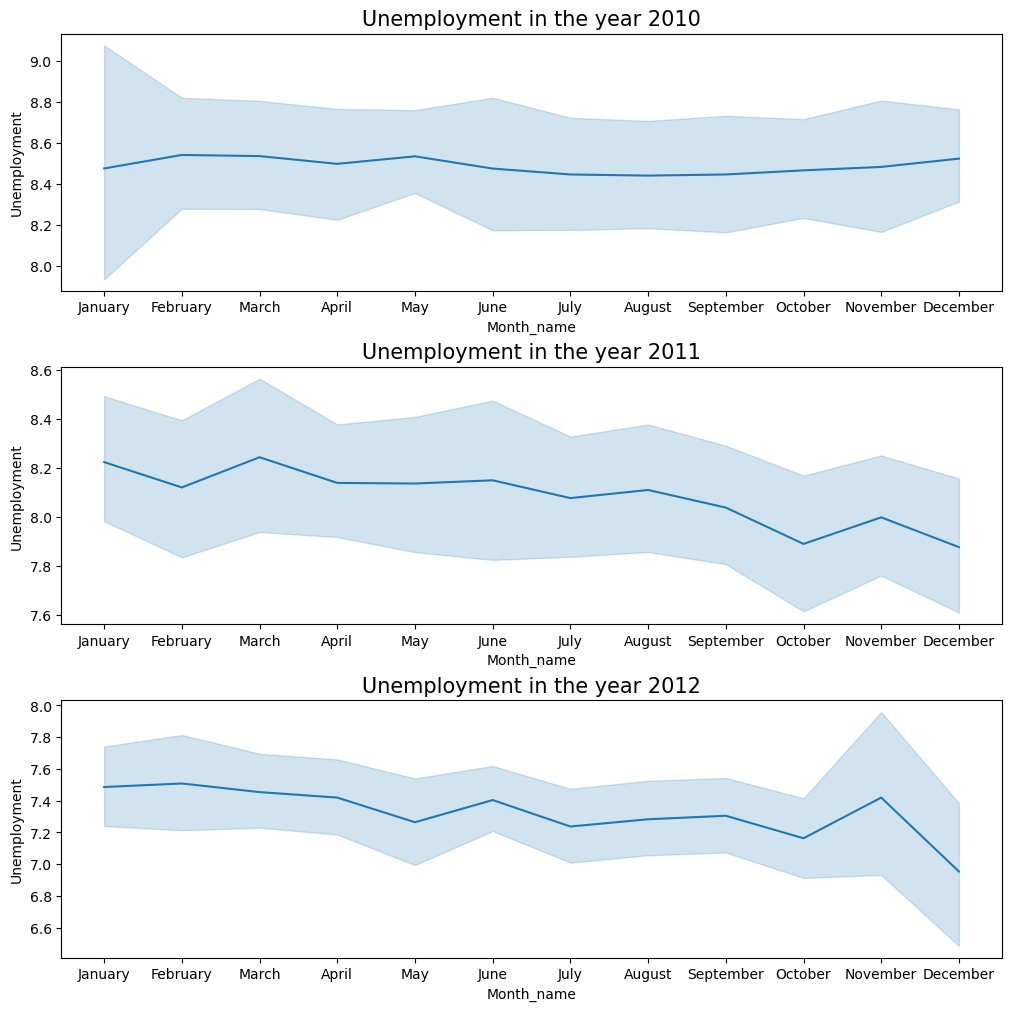

In [40]:
plt.subplots(3,1,figsize=(10,10),constrained_layout=True)
plt.subplot(3,1,1)
sns.lineplot(data=data_2010,x="Month_name",y="Unemployment")
plt.title("Unemployment in the year 2010",fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=data_2011,x="Month_name",y="Unemployment")
plt.title("Unemployment in the year 2011",fontsize=15)

plt.subplot(3,1,3)
sns.lineplot(data=data_2012,x="Month_name",y="Unemployment")
plt.title("Unemployment in the year 2012",fontsize=15)

plt.show()

In [41]:
data.head(2)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   

          CPI  Unemployment Month_name  Week  Month  Year  
0  211.096358         8.106        May    17      5  2010  
1  211.242170         8.106   December    48     12  2010

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month_name    6435 non-null   object        
 9   Week          6435 non-null   int64         
 10  Month         6435 non-null   int64         
 11  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 603.4+ KB


In [43]:
data1=data.drop(columns=['Date','Month_name'])
data1.head(2)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   

   Unemployment  Week  Month  Year  
0         8.106    17      5  2010  
1         8.106    48     12  2010

In [44]:
data1.shape

(6435, 10)

In [45]:
x=data1.drop(columns=['Weekly_Sales'])
y=data1["Weekly_Sales"]

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
mm=MinMaxScaler()
x=pd.DataFrame(mm.fit_transform(x),columns=x.columns)
x.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
0    0.0           0.0     0.434149    0.050100  0.840500      0.405118   
1    0.0           1.0     0.396967    0.038076  0.841941      0.405118   
2    0.0           0.0     0.410861    0.021042  0.842405      0.405118   
3    0.0           0.0     0.476419    0.044589  0.842707      0.405118   
4    0.0           0.0     0.475147    0.076653  0.843008      0.405118   

       Week     Month  Year  
0  0.313725  0.363636   0.0  
1  0.921569  1.000000   0.0  
2  0.117647  0.090909   0.0  
3  0.137255  0.090909   0.0  
4  0.333333  0.363636   0.0

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)


In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5148, 9)
(1287, 9)
(5148,)
(1287,)


In [51]:
!pip install xgboost

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [53]:
lm=LinearRegression(normalize=False)
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
pred

array([ 938630.83968806,  932469.51728735, 1127172.01695039, ...,
       1245965.01942918, 1162401.28860647,  855396.35675737])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [55]:
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,pred)
r2score=r2_score(y_test,pred)
print("Mean Square Error :" , mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Square Error: ",rmse)
print("r2score: ",r2score)

Mean Square Error : 263695045213.5363
Mean Absolute Error :  423870.1053201099
Root Mean Square Error:  513512.4586741166
r2score:  0.1295909901807656


In [56]:
comp=x_test.copy("deep")
comp["Actual sales"]=y_test
comp["Predicted Sales"]=pred
comp.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
5687  0.886364           0.0     0.383464    0.698898  0.113873      0.036611   
3435  0.545455           0.0     0.305479    0.141283  0.774933      0.412881   
1497  0.227273           0.0     0.773288    0.718938  0.919881      0.354131   
5388  0.840909           0.0     0.443738    0.565130  0.037898      0.863619   
4957  0.772727           0.0     0.514775    0.490982  0.142008      0.466360   

          Week     Month  Year  Actual sales  Predicted Sales  
5687  0.196078  0.181818   1.0     891154.18     9.386308e+05  
3435  0.137255  0.090909   0.0     628516.57     9.324695e+05  
1497  0.372549  0.363636   0.5    1239466.97     1.127172e+06  
5388  0.960784  1.000000   0.5     404283.84     9.028448e+05  
4957  0.098039  0.090909   0.5     903606.03     8.843809e+05

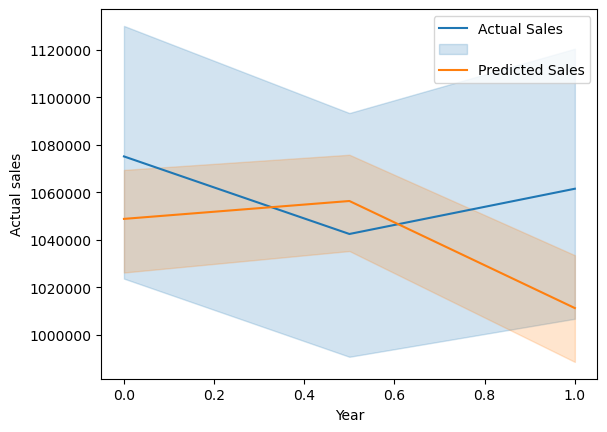

In [57]:
sns.lineplot(data=comp,x="Year",y="Actual sales")
sns.lineplot(data=comp,x="Year",y="Predicted Sales")
plt.ticklabel_format(useOffset=False,style="plain",axis="y")
plt.legend(["Actual Sales"," ","Predicted Sales"])
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score
linear_scores=cross_val_score( lm,x_train,y_train,cv=10)
np.mean(linear_scores)

0.14405000417027533

# Random Forest Regression

In [59]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [60]:
mse=mean_squared_error(y_test,rf_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,rf_pred)
r2score=r2_score(y_test,rf_pred)
print("Mean Square Error :" , mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Square Error: ",rmse)
print("r2score: ",r2score)

Mean Square Error : 10598465832.167658
Mean Absolute Error :  64912.3328595183
Root Mean Square Error:  102948.85056263454
r2score:  0.9650164069517887


In [61]:
comp=x_test.copy("deep")
comp["Actual Sales"]=y_test
comp["Predicted Sales"]=rf_pred
comp.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
5687  0.886364           0.0     0.383464    0.698898  0.113873      0.036611   
3435  0.545455           0.0     0.305479    0.141283  0.774933      0.412881   
1497  0.227273           0.0     0.773288    0.718938  0.919881      0.354131   
5388  0.840909           0.0     0.443738    0.565130  0.037898      0.863619   
4957  0.772727           0.0     0.514775    0.490982  0.142008      0.466360   

          Week     Month  Year  Actual Sales  Predicted Sales  
5687  0.196078  0.181818   1.0     891154.18     9.101824e+05  
3435  0.137255  0.090909   0.0     628516.57     6.821584e+05  
1497  0.372549  0.363636   0.5    1239466.97     1.413268e+06  
5388  0.960784  1.000000   0.5     404283.84     4.114789e+05  
4957  0.098039  0.090909   0.5     903606.03     7.946559e+05

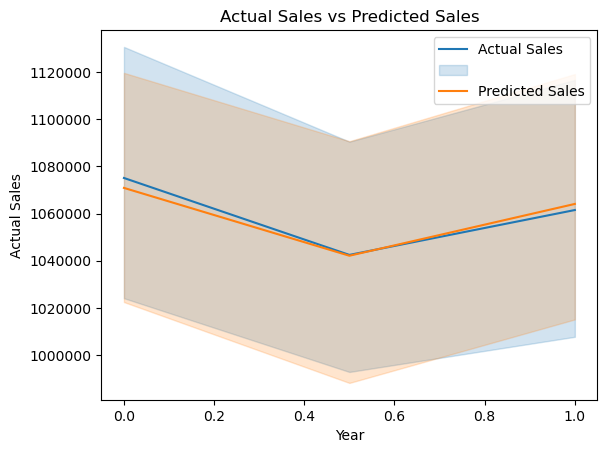

In [62]:
sns.lineplot(data=comp,x="Year",y="Actual Sales")
sns.lineplot(data=comp,x="Year",y="Predicted Sales")
plt.ticklabel_format(useOffset=False,style="plain",axis="y")
plt.legend(["Actual Sales"," ","Predicted Sales"])
plt.title("Actual Sales vs Predicted Sales")
plt.show()

In [63]:
rf_scores=cross_val_score(rf_model,x_train,y_train,cv=10)
np.mean(rf_scores)

0.9451992475191038

# XG Boost Regression

In [64]:
xbr_model=XGBRegressor()
xbr_model.fit(x_train,y_train)
xbr_pred=xbr_model.predict(x_test)


In [65]:
mse=mean_squared_error(y_test,xbr_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,xbr_pred)
r2score=r2_score(y_test,xbr_pred)
print("Mean Square Error :" , mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Square Error: ",rmse)
print("r2score: ",r2score)

Mean Square Error : 6763348641.007342
Mean Absolute Error :  54528.5920731352
Root Mean Square Error:  82239.58074435535
r2score:  0.9776754258354974


In [66]:
comp=x_test.copy("deep")
comp["Actual Sales"]=y_test
comp["Predict Sales"]=xbr_pred
comp.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
5687  0.886364           0.0     0.383464    0.698898  0.113873      0.036611   
3435  0.545455           0.0     0.305479    0.141283  0.774933      0.412881   
1497  0.227273           0.0     0.773288    0.718938  0.919881      0.354131   
5388  0.840909           0.0     0.443738    0.565130  0.037898      0.863619   
4957  0.772727           0.0     0.514775    0.490982  0.142008      0.466360   

          Week     Month  Year  Actual Sales  Predict Sales  
5687  0.196078  0.181818   1.0     891154.18   8.812547e+05  
3435  0.137255  0.090909   0.0     628516.57   5.938927e+05  
1497  0.372549  0.363636   0.5    1239466.97   1.308994e+06  
5388  0.960784  1.000000   0.5     404283.84   4.384112e+05  
4957  0.098039  0.090909   0.5     903606.03   9.094074e+05

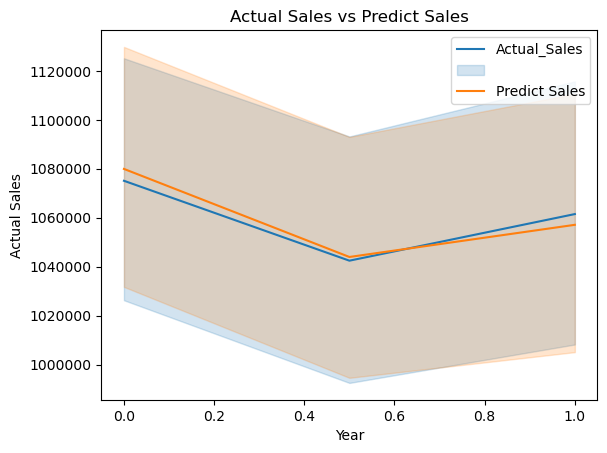

In [67]:
sns.lineplot(data=comp,x="Year",y="Actual Sales")
sns.lineplot(data=comp,x="Year",y="Predict Sales")
plt.ticklabel_format(useOffset=False,style="plain",axis="y")
plt.legend(["Actual_Sales"," ","Predict Sales"])
plt.title("Actual Sales vs Predict Sales")
plt.show()

In [68]:
xbr_scores=cross_val_score(xbr_model,x_train,y_train,cv=10)
np.mean(xbr_scores)

0.9666768415892919

In [69]:
!pip install prophet

# Preparing data for  forcasting

In [70]:
time_data=data[["Date","Weekly_Sales"]]
time_data.columns=["ds","y"]
time_data.head()

ds           y
0 2010-05-02  1643690.90
1 2010-12-02  1641957.44
2 2010-02-19  1611968.17
3 2010-02-26  1409727.59
4 2010-05-03  1554806.68

In [71]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month_name', 'Week', 'Month',
       'Year'],
      dtype='object')

In [72]:
regressors_df=data[['Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
regressors_df=regressors_df.rename(columns={'Date':'ds'})
merged_df=pd.merge(time_data,regressors_df,on="ds",how="left")

In [73]:
merged_df.head()

ds          y  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0 2010-05-02  1643690.9             0        42.31       2.572  211.096358   
1 2010-05-02  1643690.9             0        40.19       2.572  210.752605   
2 2010-05-02  1643690.9             0        45.71       2.572  214.424881   
3 2010-05-02  1643690.9             0        43.76       2.598  126.442065   
4 2010-05-02  1643690.9             0        39.70       2.572  211.653972   

   Unemployment  
0         8.106  
1         8.324  
2         7.368  
3         8.623  
4         6.566

In [74]:
from prophet import Prophet
m=Prophet(daily_seasonality=True)
m.add_regressor("Holiday_Flag")
m.add_regressor("Temperature")
m.add_regressor("Fuel_Price")
m.add_regressor("CPI")
m.add_regressor("Unemployment")
model_fit=m.fit(merged_df)


08:57:12 - cmdstanpy - INFO - Chain [1] start processing
09:03:26 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
forecast=model_fit.predict(merged_df)
forecast[['ds','yhat','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].tail()

ds          yhat  Holiday_Flag  Temperature   Fuel_Price  \
289570 2012-12-10  1.129380e+06           0.0 -5144.290914 -9902.762155   
289571 2012-12-10  1.137694e+06           0.0 -4280.423709 -2163.671020   
289572 2012-12-10  1.140804e+06           0.0  6183.516138 -5984.122007   
289573 2012-12-10  1.143797e+06           0.0  7186.716763 -5984.122007   
289574 2012-12-10  1.141678e+06           0.0   336.156942 -2181.523595   

                CPI  Unemployment  
289570 -1045.967046   1462.265373  
289571  1304.489417  -1177.304854  
289572  -844.285499  -2561.899360  
289573  -844.285499   -572.417192  
289574 -1045.967046    558.257438

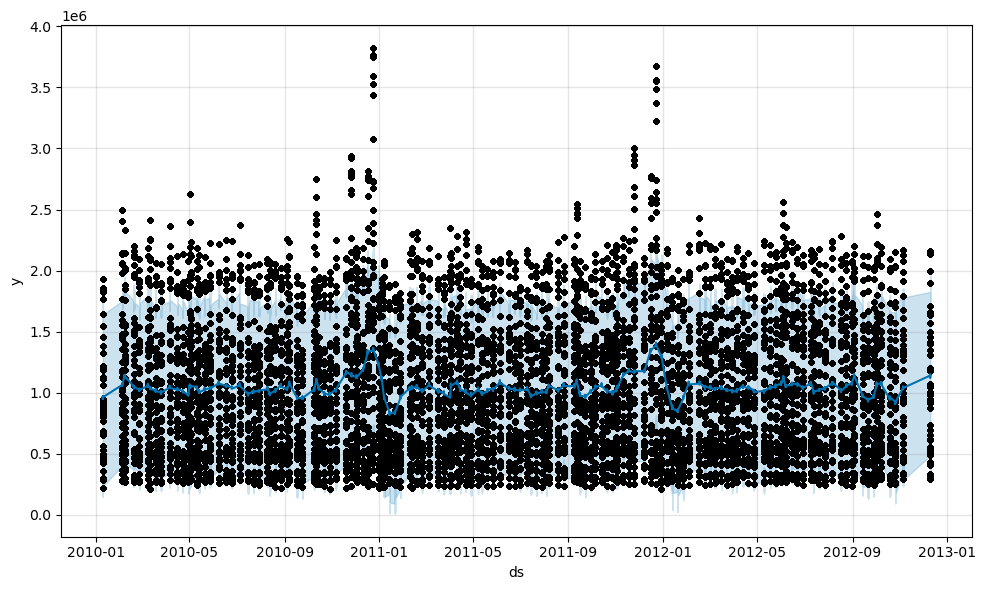

In [76]:
model_fit.plot(forecast);

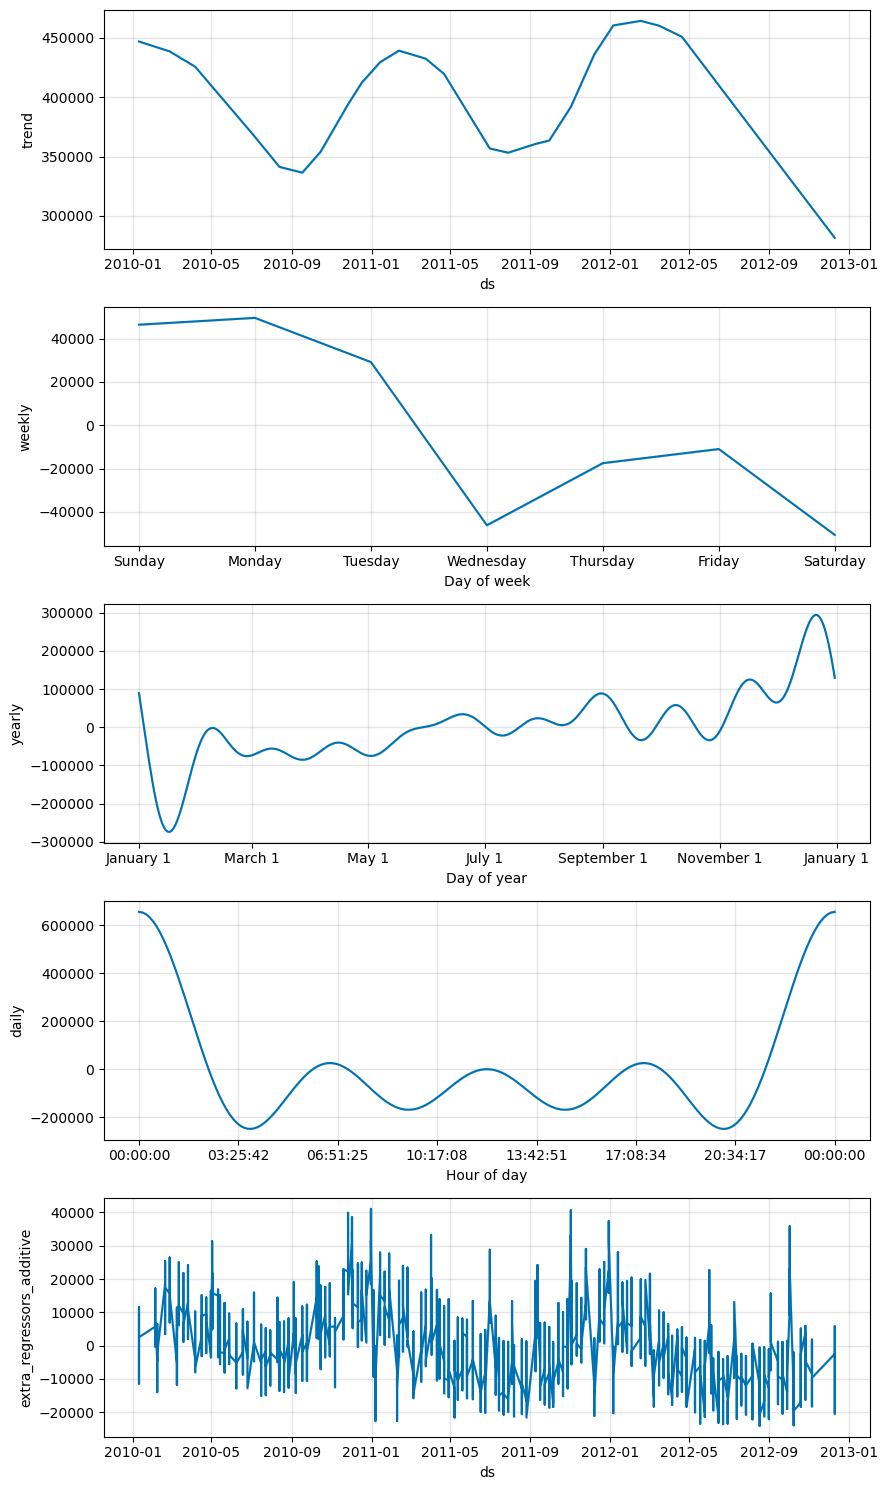

In [77]:
model_fit.plot_components(forecast);

In [78]:
predictions=forecast[['ds','yhat']]
predictions=prediction=predictions.rename(columns={'ds':'Date','yhat':'Weekly_Sales'})
predictions.head()

Date   Weekly_Sales
0 2010-01-10  962483.319344
1 2010-01-10  955324.073604
2 2010-01-10  962068.399334
3 2010-01-10  962389.745679
4 2010-01-10  961499.235053

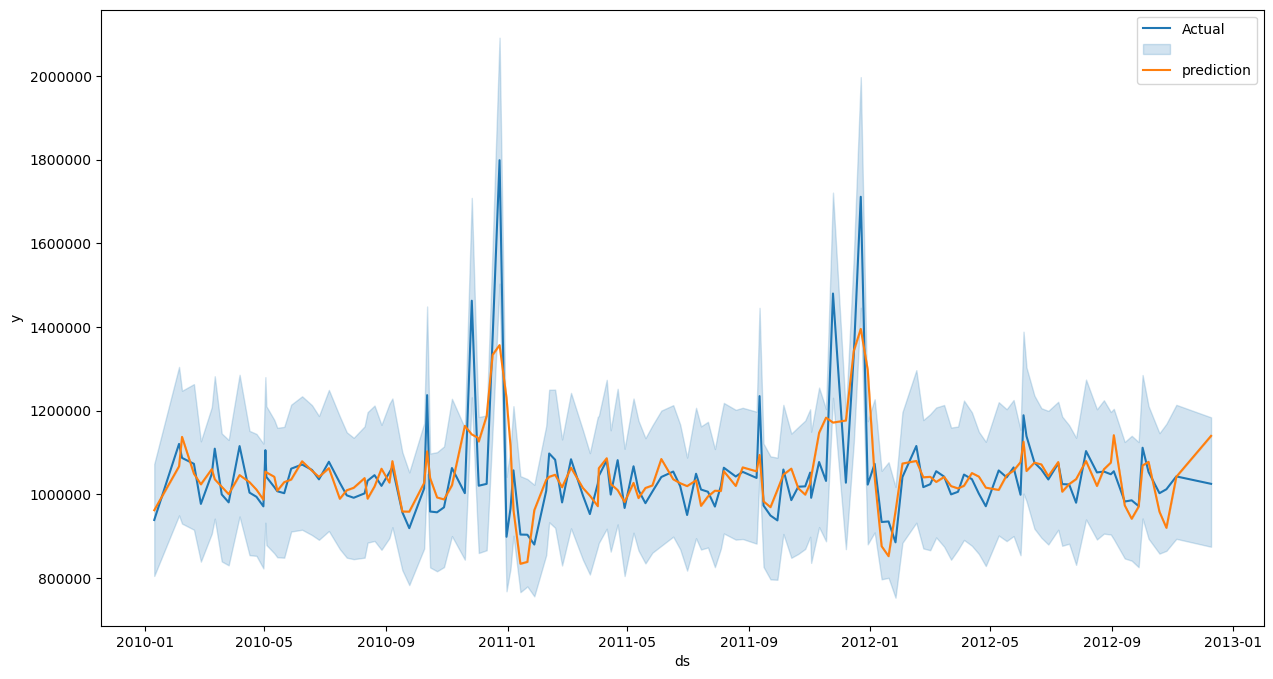

In [81]:
plt.subplots(figsize=(15,8))
sns.lineplot(data=time_data,x='ds',y='y',legend='full')
sns.lineplot(data=predictions,x='Date',y='Weekly_Sales',legend='full')
plt.legend(labels=['Actual','','prediction'])
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()


In [82]:
predictions['Date']=pd.to_datetime(predictions['Date'])
predictions['Year']=predictions['Date'].dt.year
predictions['Month']=predictions['Date'].dt.month
predictions['Month_name']=predictions['Date'].dt.month_name()
predictions['Week']=predictions['Date'].dt.week

In [83]:
predictions.head()

Date   Weekly_Sales  Year  Month Month_name  Week
0 2010-01-10  962483.319344  2010      1    January     1
1 2010-01-10  955324.073604  2010      1    January     1
2 2010-01-10  962068.399334  2010      1    January     1
3 2010-01-10  962389.745679  2010      1    January     1
4 2010-01-10  961499.235053  2010      1    January     1

In [84]:
predictions.shape

(289575, 6)

In [85]:
x_time=predictions.drop(columns=['Date','Weekly_Sales','Month_name'])
y_time=predictions[['Weekly_Sales']]

In [86]:
x_time_train,x_time_test,y_time_train,y_time_test=train_test_split(x_time,y_time,test_size=0.2,random_state=15)

In [87]:
xbr_time_model=XGBRegressor()
xbr_time_model.fit(x_time_train,y_time_train)
xbr_time_pred=xbr_time_model.predict(x_time_test)

In [88]:
x_time_train.shape,y_time_train.shape,x_time_test.shape,y_time_test.shape

((231660, 3), (231660, 1), (57915, 3), (57915, 1))

In [89]:
mse=mean_squared_error(y_time_test,xbr_time_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_time_test,xbr_time_pred)
r2score=r2_score(y_time_test,xbr_time_pred)
print("Mean Square Error :" , mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Square Error: ",rmse)
print("r2score: ",r2score)

Mean Square Error : 281716366.5584632
Mean Absolute Error :  8992.078509398127
Root Mean Square Error:  16784.408436357335
r2score:  0.9592873556655843


In [90]:
comp=x_time_test.copy("deep")
comp['Actual Sales']=y_time_test
comp['Predicted Sales']=xbr_time_pred
comp.head()

Year  Month  Week  Actual Sales  Predicted Sales
130054  2011      4    16  1.006099e+06     1.009932e+06
166369  2011      9    36  1.057657e+06     1.055011e+06
246445  2012      6    23  1.056249e+06     1.090428e+06
231751  2012      4    16  1.039359e+06     1.042359e+06
241645  2012      6    22  1.065827e+06     1.077033e+06

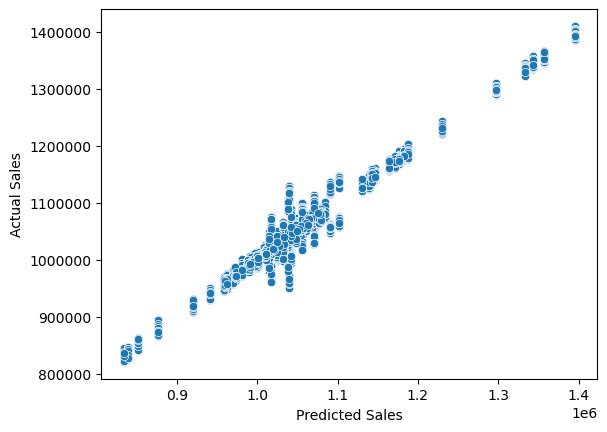

In [91]:
sns.scatterplot(data=comp,x='Predicted Sales',y='Actual Sales')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

In [92]:
xbr_time_scores=cross_val_score(xbr_time_model,x_time_train,y_time_train,cv=10)
np.mean(xbr_time_scores)

0.9601009567564855

In [93]:
m2=Prophet(daily_seasonality=True)
m2.fit(time_data)
future=m2.make_future_dataframe(periods=84)
future.tail(10)

09:26:22 - cmdstanpy - INFO - Chain [1] start processing
09:26:25 - cmdstanpy - INFO - Chain [1] done processing


ds
217 2013-02-23
218 2013-02-24
219 2013-02-25
220 2013-02-26
221 2013-02-27
222 2013-02-28
223 2013-03-01
224 2013-03-02
225 2013-03-03
226 2013-03-04

In [94]:
forecast2=m2.predict(future)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail()

ds          yhat    yhat_upper     yhat_lower
222 2013-02-28  1.003477e+06  1.713973e+06  273284.929207
223 2013-03-01  1.002405e+06  1.690383e+06  290229.924500
224 2013-03-02  9.671382e+05  1.705490e+06  268047.599581
225 2013-03-03  1.053061e+06  1.709337e+06  374917.651500
226 2013-03-04  1.056497e+06  1.787003e+06  360905.352353

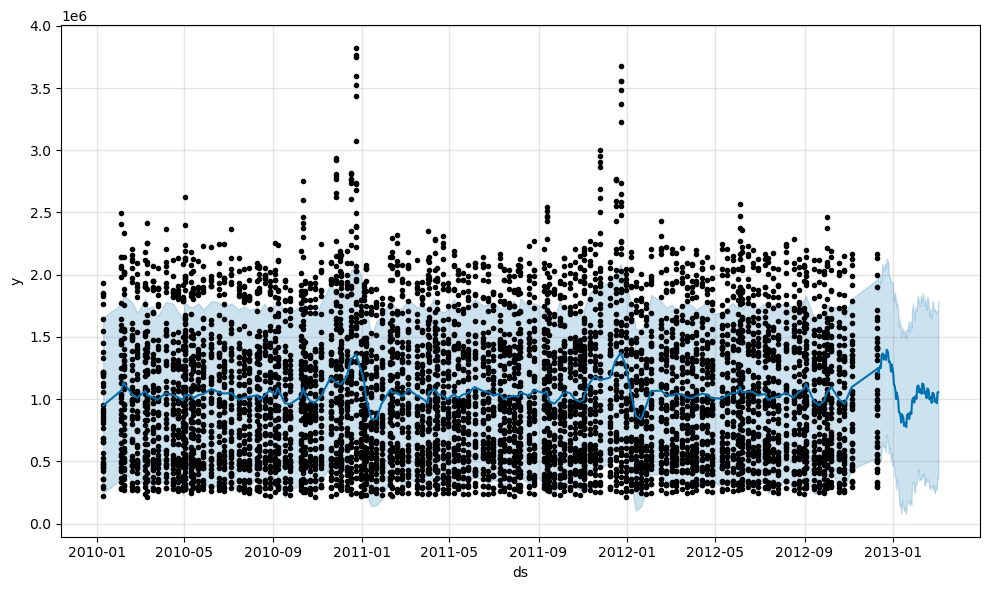

In [95]:
m2.plot(forecast2);

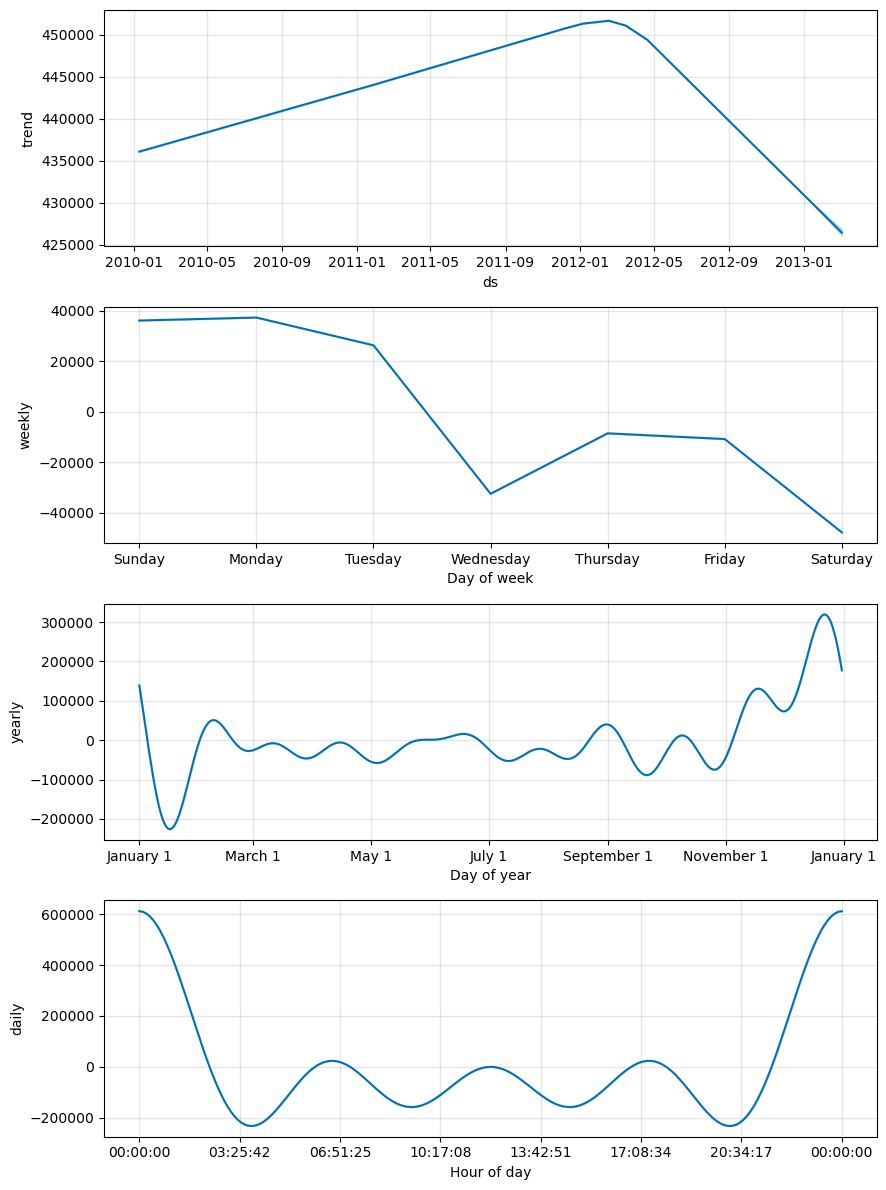

In [96]:
m2.plot_components(forecast2);

# Conclusion

1.XGBoost Regression is very fast and efficient for time series model evaluation.It provides best results and the company can trust the forecasting
2.High sales in the forecasting were observed in the end of the year 2012 and for the upcoming weeks,sales will fall down but recover quickly
3.This forecasting tells that there is a presence of seasonality.Everey  end of the year is good for sales every start of the year brings some falls in the sales and then recovery.

# End Of Project!